# **Project 1**

# 1.2

Define a problem or research question you will aim to address throughout the course

--> Something personally interesting to you

--> Tell us why it is interesting/important!

--> Something that you can perform analysis on and specifically, make a prediction about

--> The more focused, measurable, and specific you can be, the better

**Problem:**

What factors are responsible for influencing taxi fares (particularly in DC)and can we build a model to predict taxi fares based on distance, time and duration of journey.



*   I am from India, and I have used various cab services like traidtional cabs, Uber, ola, etc. The fares that cab companies show are often unpredictable and unreasonable. Also, it changes with time of day, trip distance requested, traffic on the route, etc. Even, a study shows that, in India, fares are different for same trip on mobile phones with different operating systems. That is, on Iphones, app might ask for more money than on an android phone. Now, after moving to US, I am interested in studying the taxi systems here. Beyond my personal interest, the study might help customers with transparency and predictability as well as it might help companies in understanding revenue patterns.
*   I can perform an analysis to find out patterns such as taxi useage according to seasonality, maximum serviced area, high traffic areas and predict taxi fares using trip distance, milage, and time of the day. I can cluster population on customer with specific trats who tend to tip more.
*   It is generally said that airport trips cost more than ordinary ones. We can test out a hypothesis based on the same.




# 1.3

Determine the population you wish to study

--> Describe this population.

*   The population I wish to study is taxi-cab data that provided service in the Washington DC area in year 2024.
*   The trip records differ by trip distance, time of day, mode of payment.
*   Each record contains fare details, tip amount, milage, pickup and drop off location details, timestamps.


---




# 1.4
Identify variable(s) in the population sample that you will study

* What are the independent variable(s)?

* What is the dependent variable? (Ideally you have a single DI.)

* Confounding variable

* Explain what a confounding variable is.

* Identify any potential confounding variables in your study.

* How will you deal with them?

* Or, if not something that can be dealt with here, why not and how
might you address it if you had the resources to do so?

-->

**Independent variables:** Milage, Duration, Airport (categorical- whether the trip is for airport or not), Payment Type, Trip Type, Origin and Destination Blockname, Provider Name (Cab Company)

**Dependent Variables:** Total Fare Amount

--> Confounding variable is and external factor that may affect the relationships between dependent and independent variables.

**Confounding Variables:**
*   Day of Week: trips on weekdays can be costlier than weekends or trips to vacation spots can be costlier on weekends or holidays.
*   Month of trip: seasonality affects trip fares.
*   Hour of the day: peak hours like office opening-closing timings might have higher fares.
*   Traffic/ congestion along route : traffic may increase trip time and may increase fare amount.
*   Weather conditions : bad weather conditions can increase time required to reach destination and may increase surcharge.
*   Diversions : Construction work or accidents on road may cause diversions which in turn increases trip duration.
*   Tolls : Toll booths can be time consuming and it increases the total fare because of toll fare.

We can create those variables using existing data in the dataset. Make new features such as day of week, month of trip and hour of the day.
Build seperate models over peak and non-peak hours categories.
We do not have any available data regarding weather, traffic condition and hence we can add those resources later when we have data available. If we had data resources of weather conditions and traffic conditions, we would have categorised population accordingly and build model to check for differences and analyse patterns.



---





# 1.5
Formulate a hypothesis

--> What do you suspect analysis of the data will find?

--> Use the format shown in lecture.

If trip source or destination involves airport (pickup or drop-off), then the fare amount will be higher than for non-airport trips.


---



# 1.6
Develop a detailed plan for data collection

--> How will you get the data?

--> How will you ensure representativeness when using a sample?

--> What method will you use to collect the data?

*   The data is publically available on DC Gov website which I can download and and upload it to google drive.
*   In colab, access the data on google drive and perform further analysis on it.
*   The data is available in csv format and it has 12 files for 12 months which I will merge in one file (as master dataset).
*   I can use stratified sampling with month and hour to make sure I have evenly distributed data with minimal bias. Draw a random sample size that preserves proportion across strata.
*   Data is well represented across 12 months of year, various categories such as mode of payment, source and destination locations, etc.


---



# 1.7
Choose a data set

--> Explain why this dataset is interesting to you

--> What is in the dataset?

--> Where is the dataset from?
    
    --> Include the link for where you obtained the dataset from, or if you
    created it yourself please give details of how you generated it.

--> When is the dataset from?

The data has various features that can help us predict prices, perofrm analysis and find patterns which will be useful for customers, drivers as well as cab companies. In my opinion, this is an excellent example of data science. That is why the dataset interests me.

The dataset is records of taxi trips across Washington DC in year 2024.
It has 12 csv files with records of each month and a text file with dataset info. Each file has about 200k records and in total there are more than 2.5 million records.

The dataset is publically available at DC Gov website: https://dcgov.app.box.com/v/TaxiTrips2024


Dataset has following features:
1.   TRIPTYPE
2.   PROVIDERMANE
3.   TOTALFARE
4.   GRATUITYAMOUNT
5.   SURCHARGEAMOUNT
6.   EXTRAFAREAMOUNT
7.   TOLLAMOUNT
8.   TOTALAMOUNT
9.   PAYMENTTYPE
10.  MILAGE
11.  DURATION
12.  ORIGIN
13.  DESTINATION
14.  AIRPORT
15.  ORIGINTIME
16.  DESTINATIONTIME


Categories explained:

Payment Type

1.	Credit

2.	Cash

3.	EHail

4.	Other (not sure how common this is)

5.	Uber (not sure how common this is)

Trip Type

1.	Ordinal (normal rate)

2.	VoD

3.	TransportDC (grant program)

4.	TransportDCShared (grant program)

5.	MOVA (grant program)

6.	CFSA (grant program)

7.	NRS (grant program)

8.	NEMT (grant program




---









# 1.8
Import the data in Colab

In [ ]:
# I will import the data on google drive.
import os
import glob
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
folder_path = '/content/drive/MyDrive/OpenDataDC_Taxi_2024/'
files = glob.glob(os.path.join(folder_path, '*.csv'))
print(f"Found {len(files)} files.")

Found 12 files.


In [ ]:
# now I will merge those file to make a master dataset
df_list = []
for individual_file in files:
    '''Extract month from filename.
    File naming convention is: taxi_2024_01.csv'''
    month = os.path.basename(individual_file).split("_")[-1].split(".")[0]
    temp_df = pd.read_csv(individual_file)
    temp_df["MONTH"] = month
    df_list.append(temp_df)

In [ ]:
#concat the dataframe
masterDF = pd.concat(df_list, ignore_index=True)

In [ ]:
#save the file in same directory
output = os.path.join(folder_path, "master_data.csv")
masterDF.to_csv(output, index=False)

In [ ]:
#Quick check
print(f"Master dataset created with shape: {masterDF.shape}")
print(f"Saved to: {output}")

Master dataset created with shape: (2670564, 28)
Saved to: /content/drive/MyDrive/OpenDataDC_Taxi_2024/master_data.csv


In [ ]:
#Note: all the code blocks above are one time run, because the master file will be created only once and used furtheras per the need.

# 1.9
Print the first 5 data entries from the file

In [ ]:
#heretoforth run code cells below

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

/tmp/ipython-input-954098458.py:3: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
print("First five entries:")
df.head()

First five entries:


,OBJECTID,TRIPTYPE,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,ORIGINCITY,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LAT,DESTINATION_BLOCK_LONG,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,MONTH,COMPOSITE_ID
0,1,NaN,5.68,0.00,0.25,0.00,NaN,5.93,2,Washington,...,-77.003107,100 BLOCK GALLOWAY STREET NE,38.953713,-76.988006,5100 BLOCK SARGENT ROAD NE,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_1
1,3,NaN,44.13,0.00,0.25,2.25,0.0,46.38,4,WASHINGTON,...,-77.034531,2000 BLOCK 15TH STREET NW,NaN,NaN,NaN,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_3
2,4,NaN,14.32,0.00,0.25,0.00,NaN,14.57,2,Washington,...,-77.026514,1000 BLOCK H STREET NW,38.940920,-77.021225,600 BLOCK TAYLOR STREET NW,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_4
3,5,NaN,14.05,2.57,0.25,0.00,0.0,16.87,1,Washington,...,-77.006479,UNIT BLOCK COLUMBUS CIRCLE NE,38.909637,-77.047716,2100 BLOCK P STREET NW,NaN,01/01/2024 00:00,01/01/2024 00:00,1,1_5
4,6,NaN,29.44,0.00,0.25,0.00,NaN,29.69,2,Arlington,...,NaN,NaN,38.960025,-77.082892,5300 BLOCK 42ND PLACE NW,Y,01/01/2024 00:00,01/01/2024 00:00,1,1_6


In [ ]:
print('Shape of data', df.shape)

Shape of data (2607170, 28)




---


# **Project 2**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

# **2.2.1**

Get some preliminary information about the dataset

○ What is the shape of the data?



In [ ]:
print("Shape:", df.shape)

Shape: (2607170, 28)


# **2.2.2**

○ What data types are in the data?



In [ ]:
print("Datatypes:", df.dtypes)

Datatypes: OBJECTID                    int64
TRIPTYPE                   object
FAREAMOUNT                float64
GRATUITYAMOUNT            float64
SURCHARGEAMOUNT           float64
EXTRAFAREAMOUNT           float64
TOLLAMOUNT                float64
TOTALAMOUNT               float64
PAYMENTTYPE                 int64
ORIGINCITY                 object
ORIGINSTATE                object
ORIGINZIP                  object
DESTINATIONCITY            object
DESTINATIONSTATE           object
DESTINATIONZIP             object
MILEAGE                   float64
DURATION                    int64
ORIGIN_BLOCK_LATITUDE     float64
ORIGIN_BLOCK_LONGITUDE    float64
ORIGIN_BLOCKNAME           object
DESTINATION_BLOCK_LAT     float64
DESTINATION_BLOCK_LONG    float64
DESTINATION_BLOCKNAME      object
AIRPORT                     int64
ORIGINDATETIME_TR          object
DESTINATIONDATETIME_TR     object
MONTH                       int64
COMPOSITE_ID               object
dtype: object


# **2.2.3**

○ List all the columns/variables in the data



In [ ]:
print("Features:\n", df.columns)

Features:
 Index(['OBJECTID', 'TRIPTYPE', 'FAREAMOUNT', 'GRATUITYAMOUNT',
       'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT', 'TOLLAMOUNT', 'TOTALAMOUNT',
       'PAYMENTTYPE', 'ORIGINCITY', 'ORIGINSTATE', 'ORIGINZIP',
       'DESTINATIONCITY', 'DESTINATIONSTATE', 'DESTINATIONZIP', 'MILEAGE',
       'DURATION', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE',
       'ORIGIN_BLOCKNAME', 'DESTINATION_BLOCK_LAT', 'DESTINATION_BLOCK_LONG',
       'DESTINATION_BLOCKNAME', 'AIRPORT', 'ORIGINDATETIME_TR',
       'DESTINATIONDATETIME_TR', 'MONTH', 'COMPOSITE_ID'],
      dtype='object')


# **2.2.4**

○ How many unique elements are in the data?



In [ ]:
print("Number of unique values:\n" , df.nunique())
#no. of unique object id's show us the unique entries in the dataset

'''I ran this file after preprocessing - by mistake. Before- object if has very less(3 digit) unique values'''

Number of unique values:
 OBJECTID                   266500
TRIPTYPE                        4
FAREAMOUNT                  12073
GRATUITYAMOUNT               2925
SURCHARGEAMOUNT                 6
EXTRAFAREAMOUNT               516
TOLLAMOUNT                    202
TOTALAMOUNT                 13693
PAYMENTTYPE                     5
ORIGINCITY                    634
ORIGINSTATE                    23
ORIGINZIP                     490
DESTINATIONCITY              1728
DESTINATIONSTATE               30
DESTINATIONZIP                762
MILEAGE                      7208
DURATION                     9480
ORIGIN_BLOCK_LATITUDE        8659
ORIGIN_BLOCK_LONGITUDE       8662
ORIGIN_BLOCKNAME             8203
DESTINATION_BLOCK_LAT        9729
DESTINATION_BLOCK_LONG       9736
DESTINATION_BLOCKNAME        8930
AIRPORT                         2
ORIGINDATETIME_TR            8784
DESTINATIONDATETIME_TR       8789
MONTH                          12
COMPOSITE_ID              2607170
dtype: int64


As we can see, there are 266,635 unique entries with 27 features in the dataset, there are 3 types of triptypes and 5 types of mode of payment. Fare and charge amounts, location data are in float format; whereas string format data like providername, source and destination are coded in object datatype.

In [ ]:
df['TRIPTYPE'].unique()

array(['Unknown', 'Ordinal', 'Transport DC', 'Other grant program'],
      dtype=object)

In [ ]:
print("Mean of fare amounts: ",df['FAREAMOUNT'].mean())

Mean of fare amounts:  17.456797435533556


In [ ]:
# this cell is executed once and should not be executed again
print("Unique values in providername:",df['PROVIDERNAME'].unique().sum())
NullPercentageinProvidername = (df['PROVIDERNAME'].isnull().sum()/len(df))*100
print("\n Percentage of Null values in ProviderName:",NullPercentageinProvidername)

As we can see all the values in ProviderName are null, we can just drop the column.

In [ ]:
'''this cell has been executed once and the column ProviderName does not exist in master data anymore
  so do not run this cell'''
df.drop(columns=['PROVIDERNAME'], inplace=True)

# **2.2.5**

○ Any descriptive statistics on the overall data?

In [ ]:
df.describe()

# **2.3**

Look for specific data needs for your project

○ ex. Do you have multiple datasets that need to be merged?

○ What are they?

○ How are you addressing them?

○ If there are no specific needs for your project, state/explain that.

**Answer:**

I had multiple csv files for each month of year 2024, which I already merged in project 1 to get info about whole dataset. I uploaded all the files on google drive, mounted the google drive, added folder path and merged all the files. There was not a single conflict, beacuse the dataset structure (feature sequence) is same in all the files.


---



# **2.4.1**

Look for potential issues in the data

○ Are there duplicates? How many? Anything useful around unique values?





In [ ]:
UniqueOBJECTIDPercentage = (df['OBJECTID'].nunique()/df['OBJECTID'].count()*100)
print("Percentage of duplicate rows:", UniqueOBJECTIDPercentage)

Percentage of duplicate rows: 10.221811389360878


We are able to see only 9.98% of unique object IDs in out data. Does this mean 90% of data is duplicate? No. We have merged 12 files representing each month which has own OBJECTID starting from 1.

We need to create a new column and make new ID based on month and repective object ID so that we can work on the new ID (which will work as primary key for our dataset)

In [ ]:
#before status
df.shape

(2607170, 28)

In [ ]:
''' this cell is executed once and should not be executed again
  the composite id column has been already written in master data'''
df['COMPOSITE_ID'] = df['MONTH'].astype(str) + "_" + df['OBJECTID'].astype(str)
df.to_csv(file_path, index=False)

In [ ]:
df.tail()

,OBJECTID,TRIPTYPE,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,ORIGINCITY,...,ORIGIN_BLOCK_LONGITUDE,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LAT,DESTINATION_BLOCK_LONG,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,MONTH,COMPOSITE_ID
2607165,195149,Ordinal,22.19,0.0,0.50,0.0,NaN,23.69,2,Washington,...,-77.007533,600 BLOCK 1ST STREET NE,38.930286,-77.081183,4000 BLOCK CATHEDRAL AVENUE NW,0,12/31/2024 23:00,01/01/2025 00:00,12,12_195149
2607166,195150,Ordinal,91.79,0.0,0.50,0.0,NaN,96.29,2,Arlington,...,NaN,NaN,NaN,NaN,NaN,1,12/31/2024 23:00,01/01/2025 00:00,12,12_195150
2607167,195151,Ordinal,26.16,0.0,0.50,0.0,NaN,26.66,2,Washington,...,-77.006479,UNIT BLOCK COLUMBUS CIRCLE NE,38.890064,-77.023971,UNIT BLOCK 9TH STREET NW,0,12/31/2024 23:00,01/01/2025 00:00,12,12_195151
2607168,195153,Ordinal,84.32,0.0,0.50,0.0,0.0,84.82,2,Sterling,...,NaN,NaN,38.883883,-77.024569,400 BLOCK L'ENFANT PLAZA SW,1,12/31/2024 23:00,01/01/2025 13:00,12,12_195153
2607169,195154,Ordinal,9.67,0.0,0.25,0.5,0.0,10.17,2,WASHINGTON,...,-77.054955,2500 BLOCK VIRGINIA AVENUE NW,38.900773,-77.036550,800 BLOCK 16TH STREET NW,0,12/31/2024 23:00,01/01/2025 14:00,12,12_195154


In [ ]:
#after additon of column status
df.shape

(2607170, 28)

In [ ]:
UniqueOBJECTIDPercentage = (df['COMPOSITE_ID'].nunique()/df['COMPOSITE_ID'].count()*100)
print("Percentage of duplicate rows:", UniqueOBJECTIDPercentage)

Percentage of duplicate rows: 100.0


As we can see now, we have 100% unique data without any duplicates

# **2.4.2**

○ Any missing or null values? What type of missing data? Where are they? Are they expected?



In [ ]:
#we will check similar percentages across all features
print('Percentage of Null values in feature:\n')
NullPercentage = 0
for i in range (1,27):
  NullPercentage = (df[df.columns[i]].isnull().sum() / len(df)) * 100
  print(f"{df.columns[i]}: {NullPercentage:.2f}%")

Percentage of Null values in feature:

TRIPTYPE: 0.00%
FAREAMOUNT: 0.00%
GRATUITYAMOUNT: 0.00%
SURCHARGEAMOUNT: 0.00%
EXTRAFAREAMOUNT: 0.00%
TOLLAMOUNT: 43.44%
TOTALAMOUNT: 0.00%
PAYMENTTYPE: 0.00%
ORIGINCITY: 0.00%
ORIGINSTATE: 0.00%
ORIGINZIP: 0.00%
DESTINATIONCITY: 0.00%
DESTINATIONSTATE: 0.00%
DESTINATIONZIP: 0.00%
MILEAGE: 0.00%
DURATION: 0.00%
ORIGIN_BLOCK_LATITUDE: 17.29%
ORIGIN_BLOCK_LONGITUDE: 17.29%
ORIGIN_BLOCKNAME: 17.29%
DESTINATION_BLOCK_LAT: 21.87%
DESTINATION_BLOCK_LONG: 21.87%
DESTINATION_BLOCKNAME: 21.87%
AIRPORT: 0.00%
ORIGINDATETIME_TR: 0.00%
DESTINATIONDATETIME_TR: 0.00%
MONTH: 0.00%


At time of running cell for first time:

--> TripType column has 6.67% of null values. We need to get more info about this column to work on this

--> FareAmount, GratuityAmount, SurchargeAmount, ExtraFareAmount all these columns show same percentage of null values, which can be common. Fare amount can/ should not be null/nil. So, we would drop those rows with null values of these fares (we can drop it as percentage is small).

--> TollAmount has large number of null values i.e. 44.78% which is reasonable, because each trip might not consist of routes with tolls, so the toll amount is null and we can move ahead with that.

--> Also, we have 0 null values in features such as TotalAmount, PaymentType, OriginCity, OriginZip, DestinationCIty, DestinationZip, Milage, Duration, OriginTime, DestinationTime and Month which depicts that we have complete data in those features.

--> OriginState and DestinationState have small number (0.46%) of null values. We can fill those values with mode imputation. KNN imputer can work better, but we will see if we really need it in future and we can iterate back to this step and use KNN imputer.

--> The Airport Feature tells us whether the trip is from/to the airport and the null values in the column depict that it is not a airport trip. We should modify the column in binary encoding like 1 for yes and 0 for no.

--> These are the most important preprocessing tasks required for now. Note that we have large amount of null values in Source Location and Destination Location along with BlockNames which I will probably not going to use. Still, we can do the required processing as per the need,

In [ ]:
'''this cell has been executed once, and should not be executed again. the null values in FAREAMOUNT have been dropped out of master data'''

# dropping rows with null values in FAREAMOUNT
df = df.dropna(subset=['FAREAMOUNT'])
df = df.dropna(subset=['TOTALAMOUNT'])
df.to_csv(file_path, index=False)

print("New shape:", df.shape)

New shape: (2607168, 28)


In [ ]:
NullPercentage = (df[df.columns[2]].isnull().sum() / len(df)) * 100
print('Percentage of Null values in feature:')
print(f"{df.columns[2]}: {NullPercentage:.2f}%")

Percentage of Null values in feature:
FAREAMOUNT: 0.00%


Now we have all important and relevant rows about the FARES

In [ ]:
df['AIRPORT'].unique()

array([0, 1])

At time of running cell for first time:

As mentioned in the previous text cell, this is an inconsistency. Airport feature has values 'Y' and nan. We have to encode Y (yes) to 1 and null/no to 0

In [ ]:
'''this cell has been executed already and should not be executed again as the encoding in airport column is saved in master data'''

# Replace 'Y' with 1, and NaN with 0
df['AIRPORT'] = df['AIRPORT'].apply(lambda x: 1 if x == 'Y' else 0)

print(df['AIRPORT'].value_counts(dropna=False))

AIRPORT
0    2027102
1     580068
Name: count, dtype: int64


In [ ]:
df['AIRPORT'].unique()

array([0, 1])

Mode inputation to fill null values in ORIGINSTATE and DESTINATIONSTATE: simple to use, represents data well, maintain data consistency

In [ ]:
df['ORIGINSTATE'].fillna(df['ORIGINSTATE'].mode()[0], inplace=True)
df['DESTINATIONSTATE'].fillna(df['DESTINATIONSTATE'].mode()[0], inplace=True)

/tmp/ipython-input-4285036933.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ORIGINSTATE'].fillna(df['ORIGINSTATE'].mode()[0], inplace=True)
/tmp/ipython-input-4285036933.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

In [ ]:
df['TRIPTYPE'].unique()

array(['Unknown', 'Ordinal', 'Transport DC', 'Other grant program'],
      dtype=object)

In [ ]:
df['TRIPTYPE'].fillna('Unknown', inplace=True)

/tmp/ipython-input-3128092199.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TRIPTYPE'].fillna('Unknown', inplace=True)


In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

In [ ]:
#we will check null value percentages across all features
print('Percentage of Null values in feature:\n')
NullPercentage = 0
for i in range (1,27):
  NullPercentage = (df[df.columns[i]].isnull().sum() / len(df)) * 100
  print(f"{df.columns[i]}: {NullPercentage:.2f}%")

Percentage of Null values in feature:

TRIPTYPE: 0.00%
FAREAMOUNT: 0.00%
GRATUITYAMOUNT: 0.00%
SURCHARGEAMOUNT: 0.00%
EXTRAFAREAMOUNT: 0.00%
TOLLAMOUNT: 43.44%
TOTALAMOUNT: 0.00%
PAYMENTTYPE: 0.00%
ORIGINCITY: 0.00%
ORIGINSTATE: 0.00%
ORIGINZIP: 0.00%
DESTINATIONCITY: 0.00%
DESTINATIONSTATE: 0.00%
DESTINATIONZIP: 0.00%
MILEAGE: 0.00%
DURATION: 0.00%
ORIGIN_BLOCK_LATITUDE: 17.29%
ORIGIN_BLOCK_LONGITUDE: 17.29%
ORIGIN_BLOCKNAME: 17.29%
DESTINATION_BLOCK_LAT: 21.87%
DESTINATION_BLOCK_LONG: 21.87%
DESTINATION_BLOCKNAME: 21.87%
AIRPORT: 0.00%
ORIGINDATETIME_TR: 0.00%
DESTINATIONDATETIME_TR: 0.00%
MONTH: 0.00%


# **2.4.3**

○ Any type inconsistency? ○ Any problematic misspellings/mistypings? ○ Any weird outliers?

    ■ Show how you are detecting them! (ex. using Z-Score)




Data is well handled so that it does not consist of any spelling mistakes.

In [ ]:
def calculate_z_score(column_name):
  '''function to calculate z-score:
     z=(x-mu)/sigma  '''
  return ((df[column_name]-df[column_name].mean())/df[column_name].std())

In [ ]:
outlier_target_columns = ['FAREAMOUNT', 'TOTALAMOUNT', 'GRATUITYAMOUNT', 'EXTRAFAREAMOUNT']

In [ ]:
for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    percentage_outliers = (outliers_count / len(df)) * 100
    print(column, ':', outliers_count, 'outliers')
    print(f"{percentage_outliers:.2f}% of total\n")
    print('\n')

FAREAMOUNT : 50127 outliers
1.92% of total



TOTALAMOUNT : 48152 outliers
1.85% of total



GRATUITYAMOUNT : 8941 outliers
0.34% of total



EXTRAFAREAMOUNT : 16446 outliers
0.63% of total





# **2.4.4**

Develop a detailed plan for how you will clean your data


○ Based on the potential issues you found, how will you address them?


○ What techniques will you use and why?

According to empirical rule, there should be 0.3 percent outliers outside (away from mean) the 3 standard deviations. But, there 1.85% of TOTALAMOUNT and 1.92% of FAREAMOUNT values outside 3 standard deviations. We have to look if the data explain the outliers.

For GRATUITYAMOUNT, simply remove outlier rows.

In [ ]:
outlier_target_columns = ['FAREAMOUNT', 'TOTALAMOUNT', 'EXTRAFAREAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    percentage_outliers = (outliers_count / len(df)) * 100
    print(column, ':', outliers_count, 'outliers')
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    display(outliers[display_columns].sort_values(by=column, ascending=False).tail(5))
    print('\n\n')

FAREAMOUNT : 50127 outliers


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
586033,214838,9304.4,0.0,0.25,0.0,NaN,9307.73
1174773,39662,4051.6,0.0,0.25,0.0,0.0,4051.88
1035495,157874,2870.3,0.0,0.25,1.0,0.0,2871.63
2226973,834,2285.2,0.0,0.50,0.0,NaN,2288.78
716169,96838,2268.8,0.0,0.25,0.0,0.0,2269.07


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
2031750,45023,63.43,0.0,0.25,2.50,0.0,65.93
2283363,58499,63.43,0.0,0.25,6.00,0.0,63.43
647875,26741,63.43,0.0,0.25,0.00,0.0,57.66
1856004,101940,63.43,0.0,0.50,0.00,NaN,64.93
103635,107135,63.43,0.0,0.25,3.25,0.0,63.43





TOTALAMOUNT : 48152 outliers


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
586033,214838,9304.40,0.0,0.25,0.0,NaN,9307.73
1174773,39662,4051.60,0.0,0.25,0.0,0.0,4051.88
771020,153090,15.94,2900.0,0.25,0.0,NaN,2916.19
1035495,157874,2870.30,0.0,0.25,1.0,0.0,2871.63
2414674,192719,4.00,2600.0,0.50,0.0,NaN,2604.50


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
2506356,92410,57.39,10.96,0.50,0.0,NaN,71.85
2277375,52343,71.85,0.00,0.25,0.5,0.0,71.85
2019212,32165,68.35,0.00,0.50,0.0,NaN,71.85
1752124,187882,71.35,0.00,0.25,0.5,0.0,71.85
2471366,56731,70.35,0.00,0.50,0.0,NaN,71.85





EXTRAFAREAMOUNT : 16446 outliers


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
2443391,27896,68.05,0.0,0.25,975.00,NaN,1043.30
463659,89245,36.73,0.0,0.25,625.00,NaN,661.98
1364349,233346,3.52,0.0,0.25,196.00,NaN,199.77
1560912,196104,107.28,0.0,0.25,103.25,0.0,107.28
2156358,172205,131.51,0.0,0.25,101.50,0.0,233.01


,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
1293564,161130,12.34,0.0,0.25,6.25,0.0,18.59
1292744,160300,7.87,0.0,0.25,6.25,0.0,14.12
1299224,166919,27.36,0.0,0.25,6.25,0.0,27.36
179970,8018,3.25,3.0,0.25,6.21,0.0,12.71
1625077,58410,40.06,15.0,0.50,6.15,NaN,62.71


As reflected in above tables- (data is arranged in descending order)
first table shows head (first 5 rows) and second table shows (last 5 rows)

FAREAMOUNT-

--> head values are clearly outliers

--> tail vales explain itself as there can be rides with those fare amounts.

TOTALFARE-

--> head values are clearly outliers, there should not be total far of more than 3 digits for cab in D.C.

--> tail values explain itself.

EXTRAFAREAMOUNT-

--> head values are clearly outliers, no extra charge explain such high values.

--> tail values are explainatory


Plan:

--> check percentile to values for those columns and set threshold for abnormal values

In [ ]:
df['FAREAMOUNT'].quantile([0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 0.9995])

,FAREAMOUNT
0.5000,14.30000
0.7500,20.27000
0.9000,29.92000
0.9500,40.00000
0.9900,74.48000
0.9990,109.63833
0.9995,127.47499


In [ ]:
upper_limit = 127
before_rows = df.shape[0]
df = df[df['FAREAMOUNT'] <= upper_limit]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2607168
Rows After:  2605835


In [ ]:
outlier_target_columns = ['FAREAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
224536,53851,126.91,0.00,0.25,0.0,NaN,127.16
1294684,162263,126.91,26.03,0.25,0.0,NaN,156.19
614464,244072,126.91,19.84,0.25,3.0,0.0,150.00
854132,238315,126.91,19.07,0.25,0.0,0.0,146.23
785961,168467,126.91,25.63,0.25,1.0,0.0,153.79


In [ ]:
df['TOTALAMOUNT'].quantile([0.50, 0.75, 0.90, 0.95, 0.99, 0.999, 0.9995, 0.9997, 0.9999])

,TOTALAMOUNT
0.5000,16.970000
0.7500,24.590000
0.9000,34.230000
0.9500,45.260000
0.9900,82.340000
0.9990,113.410000
0.9995,121.861660
0.9997,128.204996
0.9999,148.476664


In [ ]:
upper_limit = 128.20
before_rows = df.shape[0]
df = df[df['TOTALAMOUNT'] <= upper_limit]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2605835
Rows After:  2605053


In [ ]:
outlier_target_columns = ['TOTALAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
179527,7550,73.45,50.00,0.25,4.50,0.0,128.20
1907038,154295,123.68,4.00,0.25,0.25,0.0,128.18
2307492,83071,103.30,21.36,0.50,0.00,NaN,128.16
2532893,119604,94.11,19.55,0.50,10.00,NaN,128.16
1652010,85790,126.65,0.00,0.50,0.00,NaN,128.15


In [ ]:
df['EXTRAFAREAMOUNT'].quantile([0.50, 0.75, 0.90, 0.95, 0.99, 0.995, 0.999])

,EXTRAFAREAMOUNT
0.500,0.00
0.750,2.25
0.900,3.00
0.950,3.25
0.990,5.00
0.995,6.75
0.999,13.50


In [ ]:
upper_limit = 6.75
before_rows = df.shape[0]
df = df[df['EXTRAFAREAMOUNT'] <= upper_limit]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2605053
Rows After:  2592329


In [ ]:
outlier_target_columns = ['EXTRAFAREAMOUNT']

display_columns = ['OBJECTID', 'FAREAMOUNT', 'GRATUITYAMOUNT',
                   'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT',
                   'TOLLAMOUNT', 'TOTALAMOUNT']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

,OBJECTID,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT
237516,67313,19.96,0.00,0.25,6.75,0.0,19.96
242990,72893,12.70,0.00,0.25,6.75,0.0,19.70
241081,70930,19.16,0.00,0.25,6.75,0.0,19.16
240529,70369,21.61,4.29,0.25,6.75,0.0,32.90
628322,6735,11.91,0.00,0.25,6.75,0.0,11.91


In [ ]:
z_scores = (df['GRATUITYAMOUNT'] - df['GRATUITYAMOUNT'].mean()) / df['GRATUITYAMOUNT'].std()

before_rows = df.shape[0]
df = df[np.abs(z_scores) <= 3]
after_rows = df.shape[0]
print('Rows Before: ', before_rows)
print('Rows After: ', after_rows)

Rows Before:  2592329
Rows After:  2540217


Done with careful outlier removal. Now the rest data seems explainatory and does not show any abnormal behavior.

In [ ]:
df.shape

(2540217, 28)

In [ ]:
df.to_csv(file_path, index=False)

#do not re-run this cell

# **2.5**

Any reorganization needed?

○ ex. Any columns that would be better understood if renamed (i.e. column “a”
renamed to “age”, “height” renamed to “height in meters”)

**Answer:**

No reorganization needed. Features are well represented in dataset.

# **Project 3**

# **3.2.1**

Capture initial thoughts

○ Do you think you have the right data? Why or why not?

○ What are your initial questions before knowing much about the data?

I think I have the right data. The dataset I am using is the Taxi trips data from year 2024 in Washington D.C. Nevertheless, it has large amounts of entries (around 2.5 million rows), which is very good for capturing patterns, trends and prediction tasks. It has features such as fare amount, tip amount, trip duration, payment type, origin-destination details, etc. These features are important for the understanding of taxi fare behaviors. The data captured over a year can be very useful in detecting seasonality, peak hours and demand patterns. The data I have after data cleaning is both qualitative and quantitative.

I had read an interesting about taxi fare dynamics and patterns in India. When I landed here (in Washington D.C.), I saw skyrocketed taxi fares. It interested me and I thought that this would be an interesting thing to study.

Before seeing the data, I was curious, are all kinds of taxi fares expensive or is there a wide range of prices? What factors influence the fare amount? Are there any patterns like expensive rides during peak hours, holidays? Do airport rides cost different than normal ones? Does tipping behavior depend on somehting?

---

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

# **3.2.2**

Explore characteristics of the data

○ What is the shape of your data?



In [ ]:
print("Shape of Data:", df.shape)

Shape of Data: (2540217, 28)


# **3.2.3**

○ What does each record/row in the dataset represent?



It means that it has 2,540,217 rows and 28 columns

Each row in the dataset represents a taxi ride having details of that ride.

# **3.2.4**

○ What variables/columns do you have?



In [ ]:
column_list = df.columns.tolist()
print(column_list)

['OBJECTID', 'TRIPTYPE', 'FAREAMOUNT', 'GRATUITYAMOUNT', 'SURCHARGEAMOUNT', 'EXTRAFAREAMOUNT', 'TOLLAMOUNT', 'TOTALAMOUNT', 'PAYMENTTYPE', 'ORIGINCITY', 'ORIGINSTATE', 'ORIGINZIP', 'DESTINATIONCITY', 'DESTINATIONSTATE', 'DESTINATIONZIP', 'MILEAGE', 'DURATION', 'ORIGIN_BLOCK_LATITUDE', 'ORIGIN_BLOCK_LONGITUDE', 'ORIGIN_BLOCKNAME', 'DESTINATION_BLOCK_LAT', 'DESTINATION_BLOCK_LONG', 'DESTINATION_BLOCKNAME', 'AIRPORT', 'ORIGINDATETIME_TR', 'DESTINATIONDATETIME_TR', 'MONTH', 'COMPOSITE_ID']


The executed cell above shows all the columns present in the dataset.

In data pre-processing, I observed that dataset had very less unique values in object ID column (primary key)-  around 200k; but total rows were 2.6 million. But, then I figured out that Object ID had values starting from 1 in csv file of each month which I merged at start. We created a new column 'Composite ID' using convention 'Month'+'Object ID' and checked if Composite ID had any duplicates. There were none, making Composite ID the new Primary Key. Still, I will check once to make sure that we do not have any duplicates.

# **3.2.5**

○ Are there any duplicates?
  
    ■ How do you know?
  
    ■ For any duplicates not already addressed in Pre-Processing:

      ● How will you handle them? Handle them

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicated rows:", duplicate_rows.shape[0])

Number of duplicated rows: 0


---

# **3.2.6**

Any additional transformations/manipulations you think you might need?

○ ex. mapping categoricals to numbers, different units, different date format,
string formatting, logarithmic transformation, etc

In pre-processing, I already encoded Airport feature in binary format (1 for yes and 0 for no).

Converted amounts from varchar to float

Converted Payment Type from varchar to integer

Date format is fine, no change needed



# **3.3.1**

Explore every variable in the dataset

○ What is the variable’s datatype?



In [ ]:
for col in df.columns:
  print(col , ':', df[col].dtype)

OBJECTID : int64
TRIPTYPE : object
FAREAMOUNT : float64
GRATUITYAMOUNT : float64
SURCHARGEAMOUNT : float64
EXTRAFAREAMOUNT : float64
TOLLAMOUNT : float64
TOTALAMOUNT : float64
PAYMENTTYPE : int64
ORIGINCITY : object
ORIGINSTATE : object
ORIGINZIP : object
DESTINATIONCITY : object
DESTINATIONSTATE : object
DESTINATIONZIP : object
MILEAGE : float64
DURATION : int64
ORIGIN_BLOCK_LATITUDE : float64
ORIGIN_BLOCK_LONGITUDE : float64
ORIGIN_BLOCKNAME : object
DESTINATION_BLOCK_LAT : float64
DESTINATION_BLOCK_LONG : float64
DESTINATION_BLOCKNAME : object
AIRPORT : int64
ORIGINDATETIME_TR : object
DESTINATIONDATETIME_TR : object
MONTH : int64
COMPOSITE_ID : object


# **3.3.2**

What units are the variable measured in, and how do you know the units?



**Units-->**


FAREAMOUNT : $ (United States Dollars)

GRATUITYAMOUNT : $ (United States Dollars)

SURCHARGEAMOUNT : $ (United States Dollars)

EXTRAFAREAMOUNT : $ (United States Dollars)

TOLLAMOUNT : $ (United States Dollars)

TOTALAMOUNT : $ (United States Dollars)

MILEAGE : Miles per Galllon

DURATION : Seconds

===

Information about dataset:

PROVIDER: Office of the Chief Technology Officer (OCTO)

ORIGINATOR: Department of For-Hire Vehicles (DFHV)

Data is published by government and all the units are used according to USA standards.

---

# **3.3.3**

What does the variable represent?



OBJECTID : Unique number to represent data from a month

TRIPTYPE : Type of taxi ride

  1.	Ordinal (normal rate)
  2.	VoD
  3.	TransportDC (grant program)
  4.	TransportDCShared (grant program)
  5.	MOVA (grant program)
  6.	CFSA (grant program)
  7.	NRS (grant program)
  8.	NEMT (grant program

FAREAMOUNT : Trip Fare

GRATUITYAMOUNT : Tip provided

SURCHARGEAMOUNT : Any surcharges due to weather, traffic conditions

EXTRAFAREAMOUNT : Any extra fare recorded

TOLLAMOUNT : Amount paid at tolls, if any

TOTALAMOUNT : Total amount paid for the ride

PAYMENTTYPE : Type of Payment

  1.	Credit
  2.	Cash
  3.	EHail
  4.	Other (not sure how common this is)
  6.	Uber (not sure how common this is)


ORIGINCITY, ORIGINSTATE : self explainatory

ORIGINZIP : zip code of pick up point

DESTINATIONCITY, DESTINATIONSTATE : self explainatory

DESTINATIONZIP : zip code of drop off point

MILEAGE : Vehicle fuel efficiency

DURATION : trip duration

ORIGIN_BLOCK_LATITUDE, ORIGIN_BLOCK_LONGITUDE : pick up co-ordinates

DESTINATION_BLOCK_LAT, DESTINATION_BLOCK_LONG : drop off co-ordinates

AIRPORT : is Pick up or drop off location a local airport

ORIGINDATETIME_TR : pick up time (rounded off to nearest hour)

DESTINATIONDATETIME_TR : drop off time (rounded off to nearest hour)

MONTH : month of year

COMPOSITE_ID : Primary Key for dataset (uniquely identifies each row)

---

# **3.3.4**

Any transformations/manipulations needed to better analyze the variable?
    
    ■ Is this different from what you initially thought in step 3.2.3?



The data was expected to require minimal processing. I checked for duplicates, fixed the issue using a new column Composite ID having data of month and object ID. Now, the data has primary key. I checked for outliers in amount related features and detected and removed those using explainable thresholds.

Encoded Airport feature in binary format. We filled null values using mode.

We handled dataypes of features. We changed datatyoes of features according to our requirement.

All the required transformations and manipulations are done as per the requirement.

# **3.4.1**

Any missing data or extreme outliers?

    ■ How do you know if there are or not?
    
    ■ For any not already addressed in Pre-Processing:
      
      ● How will you handle them? Handle them.



We checked for outliers in amount related features in the dataset using z-score values. According to empirical rule, we found a number of outliers above abs(z)>3.

We checked for the actual records in the dataset, some of it was quite explainatory and important for the modelling purpose (so as to not make it biased). We checked for percentiles and values in records and removed outliers accordingly.

In [ ]:
def calculate_z_score(column_name):
  '''function to calculate z-score:
     z=(x-mu)/sigma  '''
  return ((df[column_name]-df[column_name].mean())/df[column_name].std())

In [ ]:
outlier_target_columns = ['DURATION']

display_columns = ['DURATION']

for column in outlier_target_columns:
    z_score = calculate_z_score(column)
    outliers = df[np.abs(z_score) > 3]
    outliers_count = outliers.shape[0]
    percentage_outliers = (outliers_count / len(df)) * 100
    print(column, ':', outliers_count, 'outliers')
    display(outliers[display_columns].sort_values(by=column, ascending=False).head(5))
    print('\n\n')

DURATION : 2603 outliers


,DURATION
403309,564072
1607640,563189
1653133,562871
2191713,507132
1469525,466519


In [ ]:
'''this has been executed once, no need to execute again'''
duration_z_scores = np.abs((df['DURATION'] - df['DURATION'].mean()) / df['DURATION'].std())
df = df[duration_z_scores <= 3].reset_index(drop=True)

In [ ]:
'''this has been executed once, no need to execute again'''
df = df[df['DURATION'] >= 0].reset_index(drop=True)

In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

# **3.4.2**

What are the descriptive/summary statistics for the variable?



In [ ]:
pd.set_option('display.float_format', '{:.2f}'.format)
df[['FAREAMOUNT', 'TOTALAMOUNT', 'MILEAGE', 'DURATION']].describe()

,FAREAMOUNT,TOTALAMOUNT,MILEAGE,DURATION
count,2537592.00,2537592.00,2537592.00,2537592.00
mean,16.63,19.38,4.06,1023.18
std,11.21,11.96,4.29,661.30
min,0.00,-0.50,0.00,0.00
25%,9.46,11.37,1.43,590.00
50%,14.05,16.65,2.87,877.00
75%,19.93,23.98,5.14,1278.00
max,126.91,128.18,214.16,6752.00


# **3.5.1**

What is the distribution of the variable’s values?



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

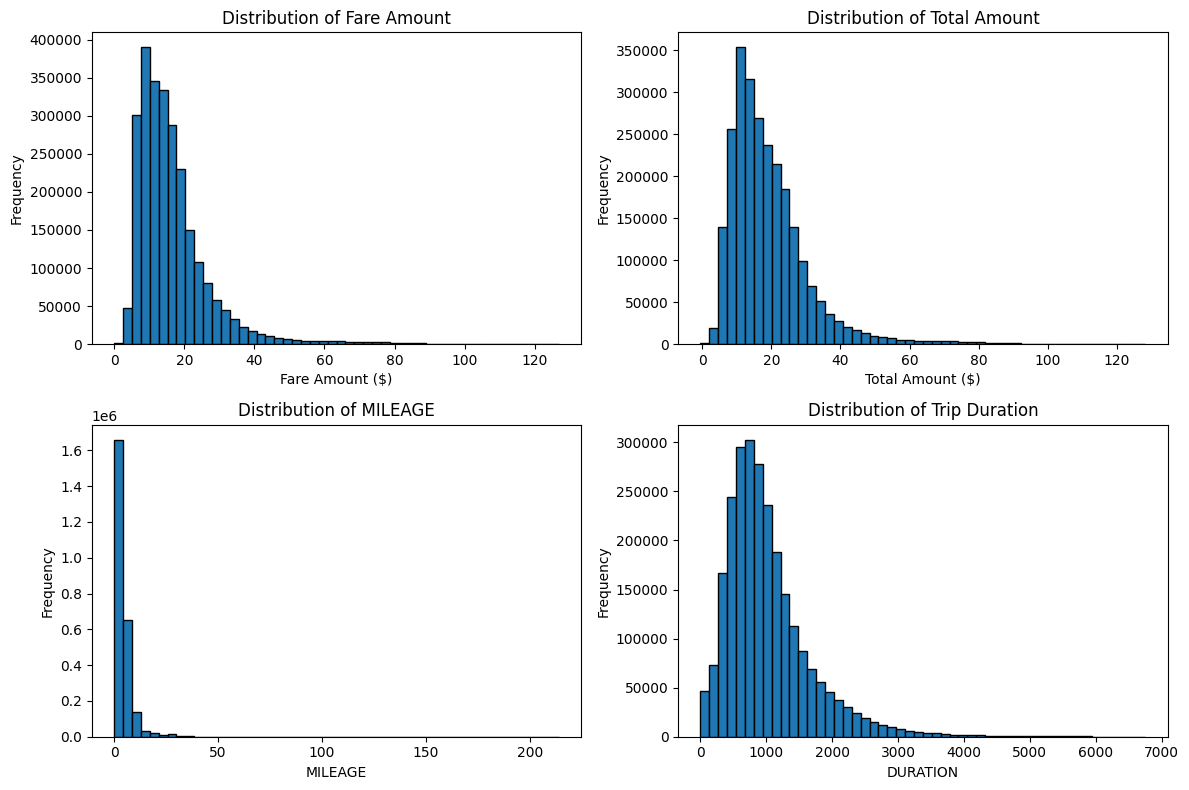

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.hist(df['FAREAMOUNT'], bins=50, edgecolor='k')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')

plt.subplot(2,2,2)
plt.hist(df['TOTALAMOUNT'], bins=50, edgecolor='k')
plt.title('Distribution of Total Amount')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')

plt.subplot(2,2,3)
plt.hist(df['MILEAGE'], bins=50, edgecolor='k')
plt.title('Distribution of MILEAGE')
plt.xlabel('MILEAGE')
plt.ylabel('Frequency')

plt.subplot(2,2,4)
plt.hist(df['DURATION'], bins=50, edgecolor='k')
plt.title('Distribution of Trip Duration')
plt.xlabel('DURATION')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As central limit theorem states, all these features follow normal distribution, and all of them are right skewed.

# **3.5.2**

What are the frequencies of values?



In [ ]:
print(df['TRIPTYPE'].value_counts())

TRIPTYPE
Ordinal                2265208
Unknown                 168253
Transport DC             91519
Other grant program      12612
Name: count, dtype: int64


In [ ]:
print(df['PAYMENTTYPE'].value_counts())

PAYMENTTYPE
1    1179195
2     942203
4     270402
6      73393
3      72399
Name: count, dtype: int64


In [ ]:
print(df['AIRPORT'].value_counts())

AIRPORT
0    1996283
1     541309
Name: count, dtype: int64


---

# **3.5.3**

Explore relationships between variables

○ Which ones appear independent? Which ones appear dependent and on what?

○ Explore possible:

    ■ Event frequencies
    ■ Periodicity/seasonality
    ■ Correlations between variables
    ■ Pairwise relationships
    ■ Anything else that could be interesting/useful in understanding your data

○ Be sure to visualize!

○ Be sure you explain in detail what you are finding/seeing (or not) in the data.

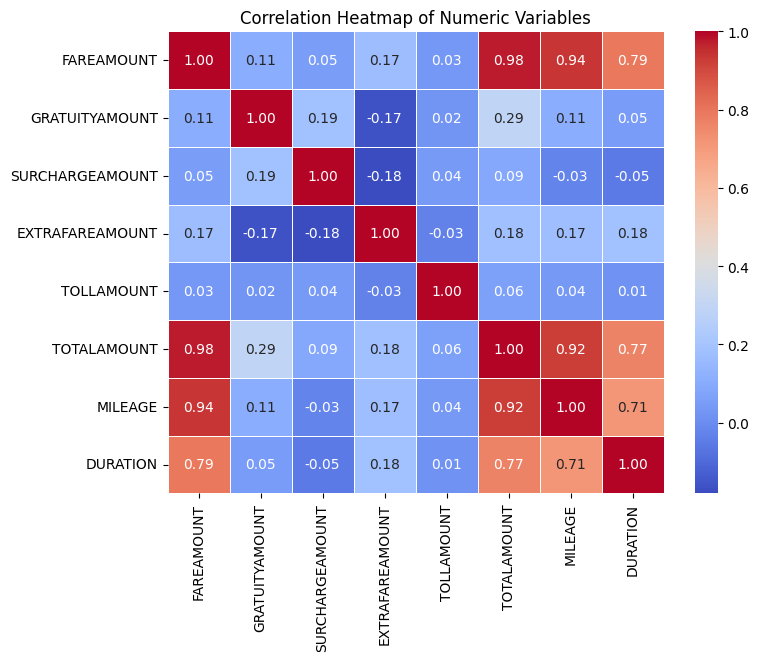

In [ ]:
columns = ['FAREAMOUNT', 'GRATUITYAMOUNT', 'SURCHARGEAMOUNT',
            'EXTRAFAREAMOUNT', 'TOLLAMOUNT', 'TOTALAMOUNT',
            'MILEAGE', 'DURATION']

correlation_matrix = df[columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

This correlation map tells us the correlation between features. It ranges from -1 to +1 and value nearer to zero means that the features are independent.

According to the map, features such as fare amount, total amount, mileage and duration are dependent on eachother.

Whereas, features such as gratuity amount, extra fare amount, surcharge amount and toll amount are not dependent on any other features.

The highest correlation value seen in the figure is 0.98, that is, fareamount and total amount, which is totally understandable that total amount is highly depoendent on fare amount.

Also, the fare amount is dependent on mileage and duration of trip.

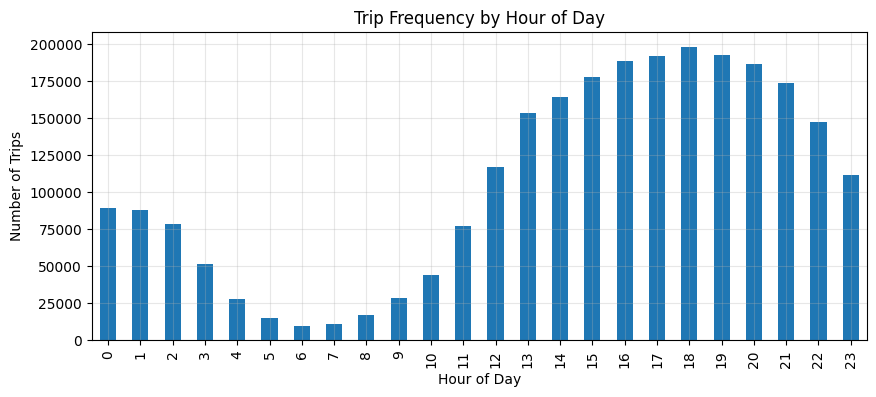

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])

df['hour'] = df['ORIGINDATETIME_TR'].dt.hour

plt.figure(figsize=(10,4))
df['hour'].value_counts().sort_index().plot(kind='bar')
plt.title('Trip Frequency by Hour of the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.grid(alpha=0.3)
plt.show()


The nice plot above represents frequency of taxi rides during an hour of the day.

It shouws that, there is peak demand for taxis from 12pm to 11pm (23:00).

Lowest demand is in between 4am to 9 am.

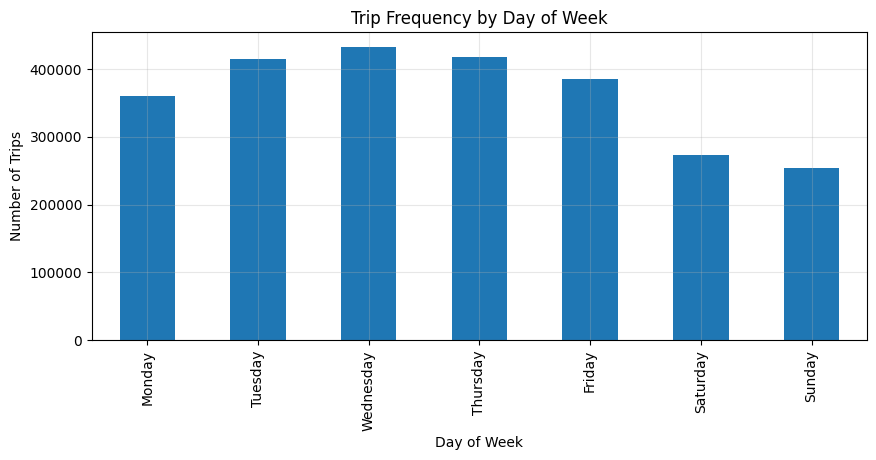

In [ ]:
df['day_of_week'] = df['ORIGINDATETIME_TR'].dt.day_name()

sequence = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,4))
df['day_of_week'].value_counts().reindex(sequence).plot(kind='bar')
plt.title('Trip Frequency by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.grid(alpha=0.3)
plt.show()

The b=plot above represents trip frequency by day of week.

It seems like there is substancial low demand on weekends in comparison with weekdays.

We can infer that, many people in Washington D.C., prefer not to go out on weekends.

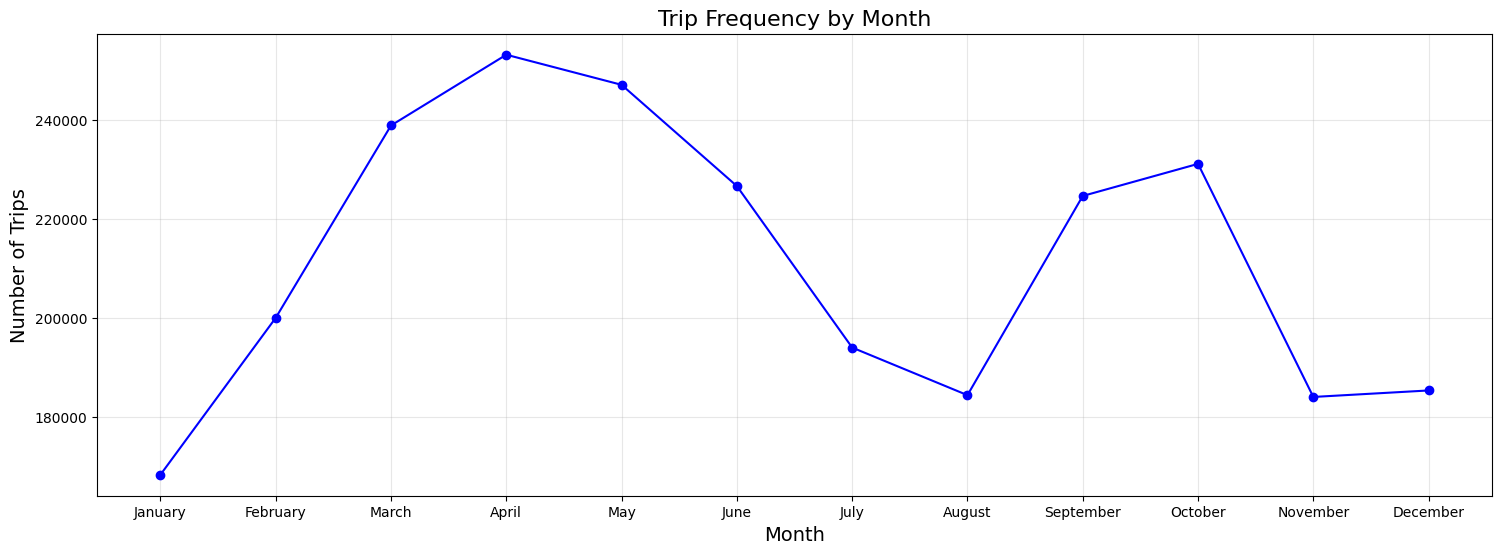

In [ ]:
df['month'] = df['ORIGINDATETIME_TR'].dt.month_name()

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Count trips per month in order
month_counts = df['month'].value_counts().reindex(month_order)

plt.figure(figsize=(18,6))
plt.plot(month_order, month_counts, marker='o', linestyle='-', color='b')  # line with points
plt.title('Trip Frequency by Month', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.grid(alpha=0.3)
plt.show()


Trip count steadily increase from Jnauary to April, peak in April, suggesting higher travel history in spring.

September and October show regular rise in useage, suggesting people getting back to work.

We can see big drops in number of trips in summer break months and winter holidays.

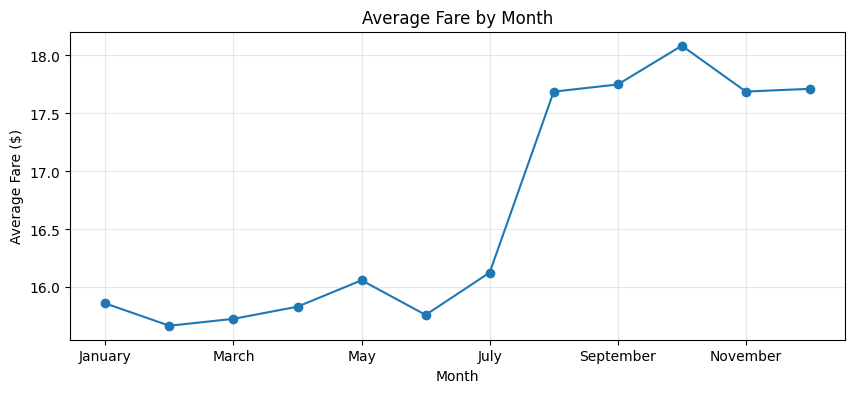

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])
df['month'] = df['ORIGINDATETIME_TR'].dt.month_name()

month_avg_fare = df.groupby('month')['FAREAMOUNT'].mean().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,4))
month_avg_fare.plot(kind='line', marker='o')
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare ($)')
plt.grid(alpha=0.3)
plt.show()


Interestingly, average fare in fall months is higher and lower in spring months.

This can be a reason behind more number of rides during spring months.

Important thing to note that the difference in this average is not very large.

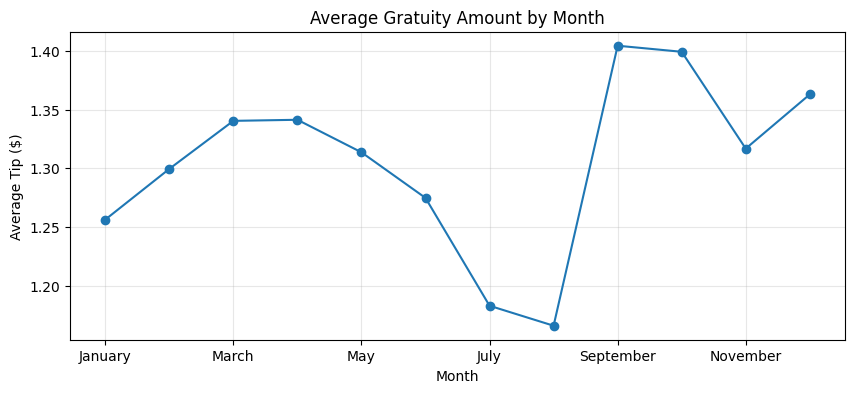

In [ ]:
month_avg_tip = df.groupby('month')['GRATUITYAMOUNT'].mean().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(10,4))
month_avg_tip.plot(kind='line', marker='o')
plt.title('Average Gratuity Amount by Month')
plt.xlabel('Month')
plt.ylabel('Average Tip ($)')
plt.grid(alpha=0.3)
plt.show()


The average tip given in fall months is higher even though it has less number of rides. Also, we can see that, people tend to tip more in December (Christmas Holidays).

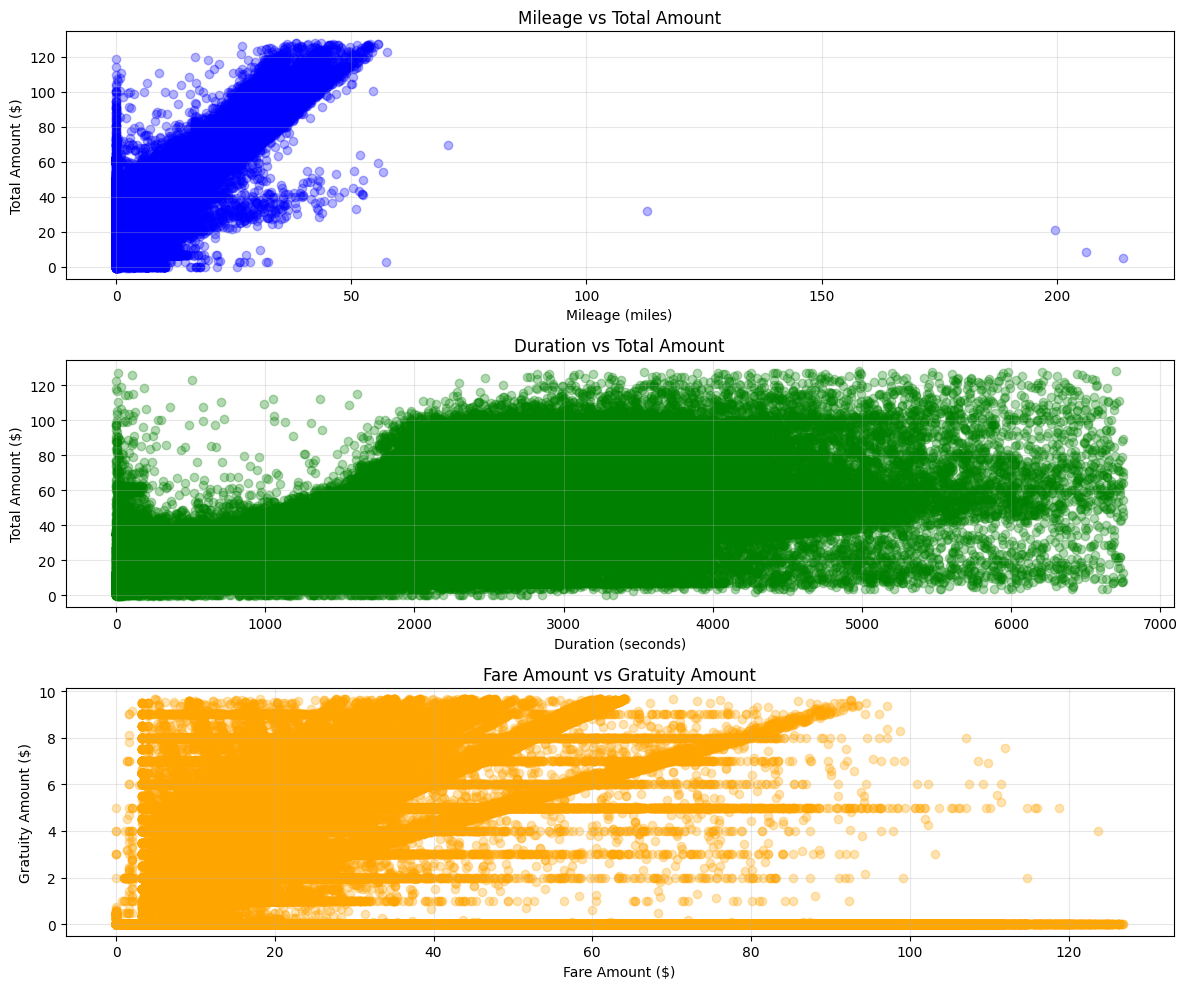

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
plt.subplot(3, 1, 1)
plt.scatter(df['MILEAGE'], df['TOTALAMOUNT'], alpha=0.3, color='blue')
plt.title('Mileage vs Total Amount')
plt.xlabel('Mileage (miles)')
plt.ylabel('Total Amount ($)')
plt.grid(alpha=0.3)

plt.subplot(3, 1, 2)
plt.scatter(df['DURATION'], df['TOTALAMOUNT'], alpha=0.3, color='green')
plt.title('Duration vs Total Amount')
plt.xlabel('Duration (seconds)')
plt.ylabel('Total Amount ($)')
plt.grid(alpha=0.3)

plt.subplot(3, 1, 3)
plt.scatter(df['FAREAMOUNT'], df['GRATUITYAMOUNT'], alpha=0.3, color='orange')
plt.title('Fare Amount vs Gratuity Amount')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Gratuity Amount ($)')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


As we can se,

Plot 1: Mileage vs Total Amount

--> It is a strong positive relationship. Total fare increases with increase in mileage

Plot 2: Duration vs Total Amount

--> It is a positive relationship. As trip duration increases, total fare also increases.

Plot 3: Fare Amount vs Gratuity Amount

--> This is a weak positive trend. It states that, with increase in fare amount, tip behavior changes. People tend to tip more in trips with high fares.

---

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


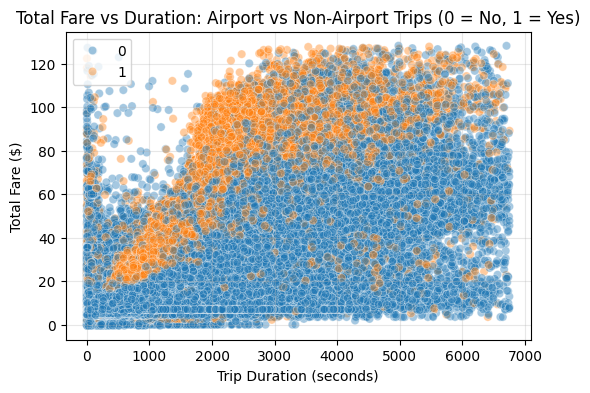

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='DURATION', y='TOTALAMOUNT', hue='AIRPORT', alpha=0.4)
plt.title('Total Fare vs Duration: Airport vs Non-Airport Trips (0 = No, 1 = Yes)')
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Total Fare ($)')
plt.legend(title='')
plt.grid(alpha=0.3)
plt.show()


As we can see,

For LOWER trip DURATIONS: Total Fares for airport trips are high (the higher orange datapoints in range of 500-4000 duration)

For Higher trip DURATIONS: Total Fare for both airport trips and non- airport trips is high.

This kind of proves our hypthesis that taxi fares are higher for airport trips.

# **3.5.4**

Optional: Extra Credit (up to 15 points): Simpson’s Paradox
    
    ■ [Up to 5 points each] If your dataset has variables with subgroups (ex.
    married vs. single, age groups, gender, illness severity groups, etc), do
    the same plots for each individual subgroup and compare them to the
    plot with the entire variable sample.

● Are there any interesting patterns or possible evidence of
Simpson’s Paradox? Explain.

**Simpson's Paradox:**

It states data can show different trends when looked through subgroups and whole in total.



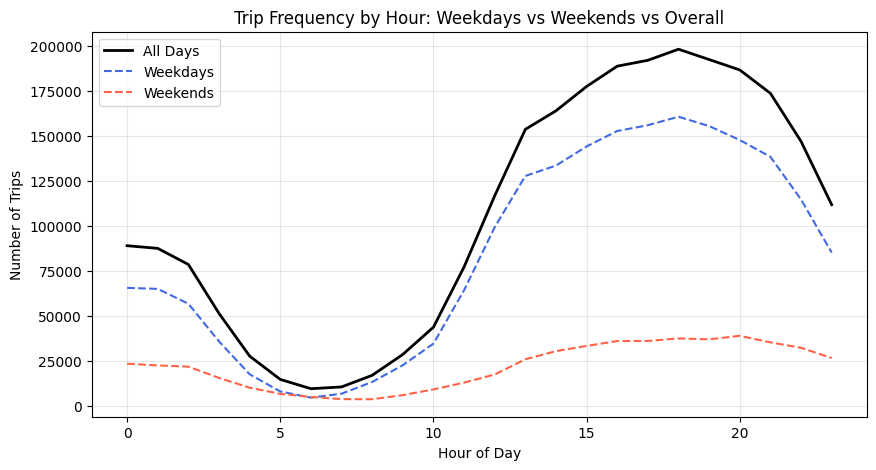

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])
df['hour'] = df['ORIGINDATETIME_TR'].dt.hour
df['day_of_week'] = df['ORIGINDATETIME_TR'].dt.dayofweek

weekday_trips = df[df['day_of_week'] < 5]
weekend_trips = df[df['day_of_week'] >= 5]

overall_trip_count = df['hour'].value_counts().sort_index()
weekday_trip_count = weekday_trips['hour'].value_counts().sort_index()
weekend_trip_count = weekend_trips['hour'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.plot(overall_trip_count.index, overall_trip_count.values, label='All Days', color='black', linewidth=2)
plt.plot(weekday_trip_count.index, weekday_trip_count.values, label='Weekdays', color='royalblue', linestyle='--')
plt.plot(weekend_trip_count.index, weekend_trip_count.values, label='Weekends', color='tomato', linestyle='--')

plt.title('Trip Frequency by Hour: Weekdays vs Weekends vs Overall')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#taken help of gen AI to make this plot

The above graph, Trip frequency by hour over weekdays and weekends, analyzes subgroups of weekdays and weekends.

As we can see, there is a peak use of taxi in hours between 10:00 to 23:00 for all days (all data together) and weekdays. But, in case of weekends, the pattern dilutes and shows minimal increase in taxi useage.

This shows tat it is an exmaple of simpson's paradox.


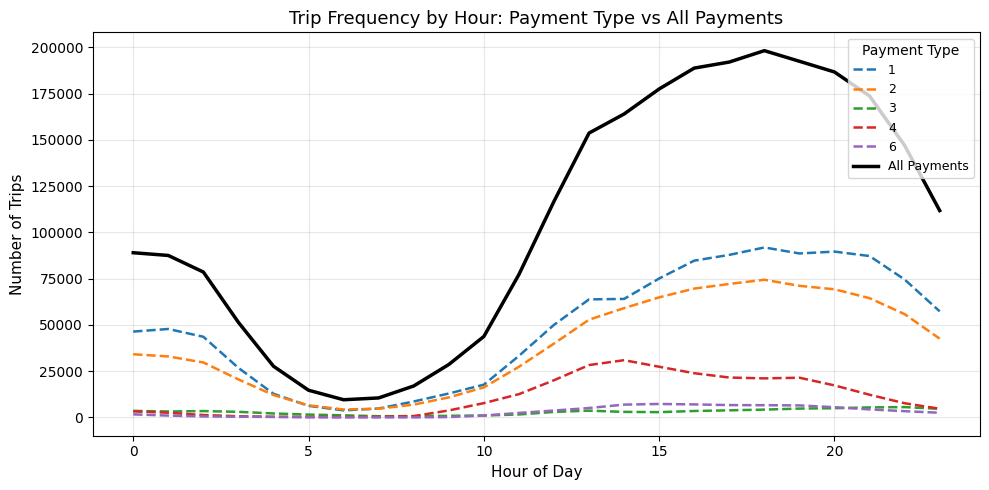

In [ ]:
df['ORIGINDATETIME_TR'] = pd.to_datetime(df['ORIGINDATETIME_TR'])
df['hour'] = df['ORIGINDATETIME_TR'].dt.hour

payment_hourly = df.groupby(['hour', 'PAYMENTTYPE']).size().unstack(fill_value=0)

payment_hourly['All Payments'] = payment_hourly.sum(axis=1)

plt.figure(figsize=(10,5))

colors = plt.cm.tab10.colors

for i, col in enumerate(payment_hourly.columns):
    if col == 'All Payments':
        plt.plot(payment_hourly.index, payment_hourly[col],
                 label=col, color='black', linewidth=2.5)
    else:
        plt.plot(payment_hourly.index, payment_hourly[col],
                 label=col, color=colors[i % len(colors)],
                 linestyle='--', linewidth=1.8)

plt.title('Trip Frequency by Hour: Payment Type vs All Payments', fontsize=13)
plt.xlabel('Hour of Day', fontsize=11)
plt.ylabel('Number of Trips', fontsize=11)
plt.legend(title='Payment Type', fontsize=9, title_fontsize=10, loc='upper right')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

#taken help of GenAI for making this plot

1 -	Credit

2 -	Cash

3 -	EHail

4 -	Other

6 -	Uber

The lines of individual payments type such as 1, 2, 3, 4 and 6 represent different trends. Whereas, combination of all payment types spread ovr hours in a day show a different trend with strong drop between 3 to 10 as well as strong peak between 11 to 23.

This is also an example of Simpson's Paradox.

---

# **3.6**

Do you trust that this data is a reasonable dataset to use?

○ Why or why not?

○ If not, how will you handle it?

I trust this data.

* It is published by government
    
    PROVIDER: Office of the Chief Technology Officer (OCTO)

    ORIGINATOR: Department of For-Hire Vehicles (DFHV)

* Features align very well with real world scenarios (as it is real world data collected by government)

* After data cleaning (filling null values, removing outliers, datatype transformation and other manipulations), we have a quality data which shows logical relationships between variables.

---

# **3.7**

Wrap up

○ Provide an overview of what you learned through the Data Exploration process.

    ■ Did this affect your hypothesis?
    ■ Why or why not?

○ Summarize any key findings, insights, or things you’ll want to explore more.

Through the data exploration process, I gained an understanding of how features such as Fare, gratuity, duration, etc. affect the Total fare of the trip.

Analysis confirmed our hypothesis that airport trips have higher fares than normal ones. It is supported by visualization. Laer, we will do this using descriptive statitucs using test scores.

We checked for relationships between features using co-relation map as well as pair plots. Mileage, duration have positive relationship with Total fare.

We captured seasonalities in trip useage over months, and hours of a day

We saw that our features follow normal distribution and it is skewed on right.

We also saw two examples of Simpson's paradox in our dataset.

More exploration- hypothesis testing using test statistics.

---


# **Project 4**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

# 4.2
What kind of ML task is presented by your hypothesis, and what type of learning is it?

○ Describe what you intend to do at a high level.

* Hypothesis: If trip source or destination involves airport (pickup or drop-off), then the fare amount will be higher than for non-airport trips.

* ML Task: Regression (Supervised Learning)

* Target Variable: TOTALAMOUNT (continuous in nature)

* Goal: To predict total amount using features such as mileage, duration, trip type.

* Reason: Regression is appropriate for modeling and finding relationships between variables. We have labelled inputs as well as labelled output. It is perfect for prediction task like this.

* High Level Plan:
  1) Select relevant features such as mileage, duration, trip type, etc.
  2) Train supervised regression models such as linear regression, regularized models, decision tree regressor, random forest regressor, XGBoost to predict TOTALAMOUNT.
  3) Evaluate models using metrics such as R squared, MSE, RMSE.
  4) Choose the best fit by comparing performance.
  5) Test Hypothesis.

# **4.3.1**
What features will you use?**

○ Show/explain how you are deciding, what you are choosing, and why




Features I am selecting are as follows:
- MILEAGE:	Strong driver of fare - linear relationship

- DURATION:	Captures traffic effects and correlates with fare
- FAREAMOUNT:	Base fare before extras - strong predictor
- TRIPTYPE:	Categorical trip type (ordinary/special program/grant program,etc)
- PAYMENTTYPE:	Categorical, tipping/charges vary by payment method
- AIRPORT:	Key variable related to hypothesis
- MONTH / DAYOFWEEK:	Captures temporal trends and fare variability

Features Not Included:
- Block names, lat/long, ZIP codes -> too sparse, too many missing values

- Provider name -> removed earlier

- GRATUITYAMOUNT, SURCHARGES, TOLLAMOUNT -> many nulls and inconsistent behavior

Why are these features selected?
- They are the strongest predictors of fare based on correlation and domain logic.

- They help control for factors like trip length, time, and type when evaluating the effect of airport trips.

- They allow both linear and nonlinear regression models to learn meaningful patterns.

# **4.3.2**
Were you able to reduce the dimensionality of your dataset? If so, by how much? If not, why not?



Yes, I am able to reduce dimentionality of the data.

I have carefull picked the features from the dataset for modeling. I have removed irrelevant features from the dataset. Originally there were 28 features. Features like ORIGINCITY,	ORIGINSTATE,	ORIGINZIP,	DESTINATIONCITY,	DESTINATIONSTATE,	DESTINATIONZIP, etc. do not add any value to our model. Those features are no way useful for predicting fare amount.

I am making a new column that calculates distance using origin and destination co-ordinates (total 4 columns - latitude and longitude for origin and destination). So that I can remove 4 co-ordinate columns from the dataset.

In total, we are removing over 44% of data (12 columns). This reduces dimentionality by significant amount by removing irrelevant data.

In [ ]:
def haversine(lat1, lon1, lat2, lon2):
    # this is haversine formula, used to calculate shortest distance (in kms) between two co-ordinates on earth (Taken help from Gen AI)
    R = 6371

    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2) ** 2
    c = 2 * np.arcsin(np.sqrt(a))

    return R * c

In [ ]:
'''this has been executed once, no need to execute again'''
df["distance"] = haversine(
    df["ORIGIN_BLOCK_LATITUDE"],
    df["ORIGIN_BLOCK_LONGITUDE"],
    df["DESTINATION_BLOCK_LAT"],
    df["DESTINATION_BLOCK_LONG"]
)

In [ ]:
df.head()

,OBJECTID,TRIPTYPE,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,ORIGINCITY,...,ORIGIN_BLOCKNAME,DESTINATION_BLOCK_LAT,DESTINATION_BLOCK_LONG,DESTINATION_BLOCKNAME,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,MONTH,COMPOSITE_ID,distance
0,1,Unknown,5.68,0.00,0.25,0.00,NaN,5.93,2,Washington,...,100 BLOCK GALLOWAY STREET NE,38.953713,-76.988006,5100 BLOCK SARGENT ROAD NE,0,01/01/2024 00:00,01/01/2024 00:00,1,1_1,1.312355
1,3,Unknown,44.13,0.00,0.25,2.25,0.0,46.38,4,WASHINGTON,...,2000 BLOCK 15TH STREET NW,NaN,NaN,NaN,0,01/01/2024 00:00,01/01/2024 00:00,1,1_3,NaN
2,4,Unknown,14.32,0.00,0.25,0.00,NaN,14.57,2,Washington,...,1000 BLOCK H STREET NW,38.940920,-77.021225,600 BLOCK TAYLOR STREET NW,0,01/01/2024 00:00,01/01/2024 00:00,1,1_4,4.593292
3,5,Unknown,14.05,2.57,0.25,0.00,0.0,16.87,1,Washington,...,UNIT BLOCK COLUMBUS CIRCLE NE,38.909637,-77.047716,2100 BLOCK P STREET NW,0,01/01/2024 00:00,01/01/2024 00:00,1,1_5,3.839920
4,6,Unknown,29.44,0.00,0.25,0.00,NaN,29.69,2,Arlington,...,NaN,38.960025,-77.082892,5300 BLOCK 42ND PLACE NW,1,01/01/2024 00:00,01/01/2024 00:00,1,1_6,NaN


In [ ]:
df["distance"].isna().sum()

np.int64(871547)

In [ ]:
null_pct = df["distance"].isna().mean() * 100
print(f"Percentage of null values in distance: {null_pct:.2f}%")


Percentage of null values in distance: 34.35%


Thats a lot of null values in distance column. I will impute it using origin zip and destination zip columns and make a new column that mentions whether the distance is imputed

In [ ]:
df["distance_imputed"] = df["distance"].isna().astype(int)

df["distance"] = df.groupby(["ORIGINZIP", "DESTINATIONZIP"])["distance"] \
                            .transform(lambda x: x.fillna(x.median()))

In [ ]:
null_pct = df["distance"].isna().mean() * 100
print(f"Percentage of null values in distance: {null_pct:.2f}%")

Percentage of null values in distance: 21.60%


Still, that is a lot of null values in distance column. I can not drop it directly. I will impute it using median and anytime if it affects the model, we will make a column that flags distance imputed rows. So, we can handle it later, if needed.

In [ ]:
df["distance"].fillna(df["distance"].median(), inplace=True)


/tmp/ipython-input-400589456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["distance"].fillna(df["distance"].median(), inplace=True)


In [ ]:
null_pct = df["distance"].isna().mean() * 100
print(f"Percentage of null values in distance: {null_pct:.2f}%")

Percentage of null values in distance: 0.00%


In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

Now remove the intended columns:

In [ ]:
cols_to_drop = [
    "ORIGINCITY",
    "ORIGINSTATE",
    "ORIGINZIP",
    "DESTINATIONCITY",
    "DESTINATIONSTATE",
    "DESTINATIONZIP",
    "ORIGIN_BLOCK_LATITUDE",
    "ORIGIN_BLOCK_LONGITUDE",
    "DESTINATION_BLOCK_LAT",
    "DESTINATION_BLOCK_LONG",
    "ORIGIN_BLOCKNAME",
    "DESTINATION_BLOCKNAME"
]

df.drop(columns=cols_to_drop, inplace=True)


In [ ]:
df["ORIGINDATETIME_TR"] = pd.to_datetime(df["ORIGINDATETIME_TR"])

# Create day_of_week column (0=Monday, 6=Sunday)
df["day_of_week"] = df["ORIGINDATETIME_TR"].dt.dayofweek

In [ ]:
df.head()

,COMPOSITE_ID,TRIPTYPE,FAREAMOUNT,GRATUITYAMOUNT,SURCHARGEAMOUNT,EXTRAFAREAMOUNT,TOLLAMOUNT,TOTALAMOUNT,PAYMENTTYPE,MILEAGE,DURATION,AIRPORT,ORIGINDATETIME_TR,DESTINATIONDATETIME_TR,MONTH,day_of_week,distance,distance_imputed
0,1_1,Unknown,5.68,0.00,0.25,0.00,NaN,5.93,2,0.68,211,0,2024-01-01,01/01/2024 00:00,1,0,1.312355,0
1,1_3,Unknown,44.13,0.00,0.25,2.25,0.0,46.38,4,17.36,2229,0,2024-01-01,01/01/2024 00:00,1,0,2.400633,1
2,1_4,Unknown,14.32,0.00,0.25,0.00,NaN,14.57,2,2.81,958,0,2024-01-01,01/01/2024 00:00,1,0,4.593292,0
3,1_5,Unknown,14.05,2.57,0.25,0.00,0.0,16.87,1,2.18,1313,0,2024-01-01,01/01/2024 00:00,1,0,3.839920,0
4,1_6,Unknown,29.44,0.00,0.25,0.00,NaN,29.69,2,9.48,1483,1,2024-01-01,01/01/2024 00:00,1,0,2.400633,1


In [ ]:
df.shape

(2537592, 18)

# **4.3.3**
○ What is the dimensionality of the resulting dataset you plan to use with your
algorithm?



After selecting the meaningful features, the final dataset has approximately:

8 meaningful base features

around 18 total dimensions

This is significantly smaller and easier to model than the original dataset.

# **4.3.4**
○ What assumptions can be reasonably made about the resulting dataset? Why?

    ■ Ex. Normality, independence, etc



1. Each trip is independent
2. Fare has strong positive relationship with distance, mileage and duration.

# **4.3.5**
○ What are the names of the selected features, and for each one, are they
discrete/categorical or continuous?



- MILEAGE:	Continuous

- DURATION:	Continuous
- AIRPORT:	Binary categorical (binary encoded)
- TRIPTYPE:	Categorical (one-hot encoded)
- PAYMENTTYPE:	Categorical (one-hot encoded)
- MONTH:	Categorical (one-hot encoded)
- DAYOFWEEK:	Categorical (one-hot encoded)
- Distance: Continuous

# **4.3.6**
○ Optional: Extra Credit (up to 10 points):

    ■ Try out a couple of different techniques and compare them.
    ■ Which one gave you the highest reduction in dimensions (number of
    features)?
    ■ What do you think might be the reason for the difference? (Or if there
    was no difference, why might that be?)
    ■ What is the benefit of reducing dimensionality?

**Techniques used**
- Domain knowledge based filtering: removed irrelevant features from the dataset like "COMPOSITE_ID", "DESTINATIONDATETIME_TR", "ORIGINDATETIME_TR", "distance_imputed".
- Lasso: Lasso reduces dimensions by eliminating some features entirely. L1 regularier uses L1 penalty which drives many coefficients to exactly zero, removing irrelevant or redundant features.
- PCA: it creates new features (principal components) that are linear combinations of all your original features. We select top 90% of principal components that explain maximum variance.

I am making a new dataframe for the reduction testing so that we don't make changes to original data. Lasso and PCA need features without null values, so I am filling it. Null values in gratuity, surcharge, toll amount, and extrafare amount are nothing but zero, so fill it with zero. In remaining columns, fill median for numberic columns and mode for categorical columns. Scale the data using standard scaler so that each and every fetures has same importance.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA

df_copy = df.copy()

y = df_copy["TOTALAMOUNT"]

X = df_copy.drop(columns=[
    "FAREAMOUNT", "TOTALAMOUNT", "COMPOSITE_ID",
    "DESTINATIONDATETIME_TR", "ORIGINDATETIME_TR", "distance_imputed"
])

df["GRATUITYAMOUNT"] = df["GRATUITYAMOUNT"].fillna(0)
df["SURCHARGEAMOUNT"] = df["SURCHARGEAMOUNT"].fillna(0)
df["TOLLAMOUNT"] = df["TOLLAMOUNT"].fillna(0)
df["EXTRAFAREAMOUNT"] = df["EXTRAFAREAMOUNT"].fillna(0)

numeric_cols = X.select_dtypes(exclude=["object"]).columns.tolist()
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()

for col in numeric_cols:
    X[col] = X[col].fillna(X[col].median())

for col in categorical_cols:
    X[col] = X[col].fillna(X[col].mode()[0])

X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
#   Lasso with cross-validation

lasso = LassoCV(cv=5, random_state=42, n_jobs=-1)
lasso.fit(X_scaled, y)

lasso_coef = pd.Series(lasso.coef_, index=X_encoded.columns)
selected_features = lasso_coef[lasso_coef != 0]

print("LASSO Result:")
print("Number of features kept:", selected_features.count())
print("Selected features:\n", selected_features.sort_values(key=abs, ascending=False))
print("\n")

LASSO Result:
Number of features kept: 12
Selected features:
 MILEAGE                         8.298163
DURATION                        3.201778
GRATUITYAMOUNT                  2.012281
AIRPORT                         0.727265
TRIPTYPE_Transport DC          -0.714752
EXTRAFAREAMOUNT                 0.581564
SURCHARGEAMOUNT                 0.574364
MONTH                           0.494085
distance                       -0.355827
TOLLAMOUNT                      0.153421
PAYMENTTYPE                    -0.064189
TRIPTYPE_Other grant program   -0.043948
dtype: float64




Lasso kept 12 features. It suggests that mileage, duration, and gratuity amount are strong features that affect fare price. Also, trip type (negative high) suggests that special trip type (special program) reduces fair, maybe discounted programs. It reduced 2 dimentions from the data.

In [ ]:
#   PCA

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = explained_variance_ratio.cumsum()

n_pcs_90 = (cumulative_variance < 0.90).sum() + 1

print("PCA Result:")
print("Total number of features:", X_scaled.shape[1])
print("Number of principal components to explain 90% variance:", n_pcs_90)
print("Explained variance of PCs:", explained_variance_ratio[:])

PCA Result:
Total number of features: 14
Number of principal components to explain 90% variance: 11
Explained variance of PCs: [0.1676438  0.14253829 0.12246991 0.07612975 0.07200716 0.07164119
 0.06989871 0.06893908 0.05326295 0.05064843 0.03735351 0.03273848
 0.01808283 0.01664591]


PCA has generated new principal components that use 11 features to capture 90% of variance in the data. We cannot explicitely tell if which features are used, but we now have 11 principal components that capture maximum variance.

**Comparison:**
It depends, but in this case, PCA is better than lasso.
We can choose the percentage of variance we want. If we capture 95% of maximum variance, it may use 12 features. Both techniques are good for dimentionality reduction.

# **4.4.1**
What algorithm will you use?**
    



    ■ Choice: Linear Regression
    
    ■ Linear Regression is my starting algorithm because my hypothesis directly involves measuring the effect of the AIRPORT feature on fare amount, and linear models provide interpretable coefficients that show how much the airport variable increases the fare.


# **4.4.2**
What assumptions does this algorithm make?**
    
    


It assumes-
        
        ● data has roughly linear relationship in predicting features.
        
        ● taxi trips are independent of eachother (which is in fact true)
        
        ● no perfect multicollinearity
        
        ● no outliers (linear regression is vulnerable to outliers)


# **4.4.3**
Is this algorithm known to be prone to any issues that you should watch out for? Are there well-known mitigations you should use?**




      ● It is sensitive to outliers (already mitigated, as we have removed outliers in data cleaning)
        
      ● High correlation between features can make coefficients unstable.
      Mitigation Startegy:
      - Use Ridge or Lasso if needed
        
      ● it cannot capture non-linear relationships
      Mitigation Strategy:
      - Use different/ complex model such as random forest regressor/ XGBoost

# **4.4.4**
Explain why you think this algorithm is a good candidate for the ML task indicated in #2**

    ● The hypothesis requires interpretation, not just prediction.
    Linear Regression can tell us exactly how much the AIRPORT feature changes the fare (using slope)
        
    ● We have seen strong positive relationship between fare and mileage, duration. So, for this positive linear relation, linear model is useful.
        
    ● Linear regression is simple, fast, explainable.

# **4.5**
What are the hyperparameters for your algorithm and how will you choose/tune them? Choose them.**

    ● Linear regression does not have any hyperparameters.
    ● But, if model is overfitting, I will use reidge/lasso (L1/L2) regularizers which have hyperparameter alpha. I can test different values of alpha to achieve best result.
        

# **4.6**
Are there any post-processing techniques you may need to apply?**
○ ex. Post-pruning a Decision Tree
○ Why or why not?
○ If so, what are they?

    ● Linear regression does not need any post processing like pruning.
    ● It is because, it is famous for simplicity and low computation.
    ● Still, I can do some steps such as error plotting and analysis, inverse scaling for prediction of fare.

# **4.7**
Run ML code

○ Split your data into the appropriate training and test sets (assuming
supervised ML)

○ Run your algorithm

○ Fit the model (if applicable)

○ Perform any needed post-processing

○ Make predictions on your test dataset

○ Print the accuracy

    ■ Note: There is no need to analyze metrics yet (that will happen in the
    next project). Just print the accuracy for now.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
'''this has been executed once, no need to execute again'''
df = pd.get_dummies(df, columns=["TRIPTYPE"], prefix="TRIPTYPE", drop_first=False)

One hot encoded triptype column.

In [ ]:
'''this has been executed once, no need to execute again'''
df.to_csv(file_path, index=False)

In [ ]:
selected_features = [
    "MILEAGE",
    "DURATION",
    "AIRPORT",
    "TRIPTYPE_Ordinal",
    "TRIPTYPE_Other grant program",
    "TRIPTYPE_Transport DC",
    "TRIPTYPE_Unknown",
    "MONTH",
    "distance",
    "PAYMENTTYPE"
]

X = df[selected_features]
y = df["FAREAMOUNT"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [ ]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred = lr.predict(X_test_scaled)

In [ ]:
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression Accuracy Metrics:")
print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Linear Regression Accuracy Metrics:
R² Score: 0.9286150029342496
MAE: 1.6570447464435072
MSE: 9.056992898430186
RMSE: 3.0094838259127075


# **Project 5**

In [ ]:
import os
import glob
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
folder_path = "/content/drive/MyDrive/OpenDataDC_Taxi_2024/"
file_path = folder_path + "master_data.csv"
df = pd.read_csv(file_path)

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
!pip install xgboost
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# **5.2.1**

What metrics will most effectively measure the performance of your
model? Why?

■ Ex. Confusion matrix, precision vs recall for classification

-->

As I am predicting the fare for a taxi trip (regression task), best evalation metrics are as follows:

1) R squared (coefficient of determination):
- Measures How much of variance model exaplains in FAREAMOUNT
- Higher the value, better the model (1 is best)

2) MAE (Mean Absolute Error):
- Average absolute difference between acutal and predicted fare
- Robust to outliers and easy to interpret

3) MSE (Mean Squared Error):
- Penalizes larger errors more heavily
- Helps detect if the model struggles with extreme fares (robust to outliers)

4) RMSE (Root Mean Squared Error):
- Same scale as target variable
- Square root of MSE


# **5.2.2**

Do you need to compare these metrics across models?

■ Why or why not?

■ How will you do it?

■ Do it.

-->

Yes. Each algorithm can give us different results. The best fit algorithm depends on the case we are working on. There is no one perfect salgorithm which works well on any data.

Even if linear regression works well, random forest regressor, Boosting algorithm, deep neural network might perform better on the same data.

That is why we need to compare these metrics across multiple models.

# **5.2.3**

Show/visualize the performance metric(s).

■ ex. Print metrics (individual metrics, confusion matrix, heatmap,
etc), cross-validate, print errors, etc - whatever makes sense for your
method

In [ ]:
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Linear Regression Accuracy Metrics:")
print("R² Score:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Linear Regression Accuracy Metrics:
R² Score: 0.9286150029342496
MAE: 1.6570447464435072
MSE: 9.056992898430186
RMSE: 3.0094838259127075


-->

R² is 0.92 (close to 1), it means that model explains 92% variance in the target variable. It is clearly a good score for a prediction model for taxi data, which has noisy data and it is highly dependent on real world factors)

MAE is 1.65
The model predictions are off by about $1.66 on average (relatively small number- it means that we can predict actual fare

± $1.67)

MSE is 9.05 (lower the better)

RMSE is 3.0094 which means that typical prediction error is about $3

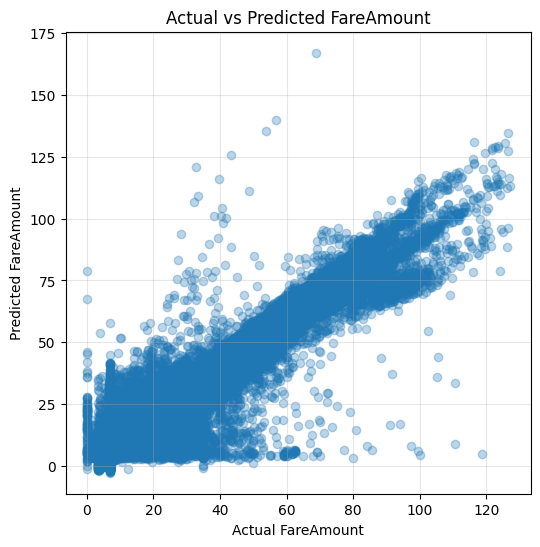

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual FareAmount")
plt.ylabel("Predicted FareAmount")
plt.title("Actual vs Predicted FareAmount")
plt.grid(alpha=0.3)
plt.show()


**Scatterplot: Actual vs Predicted**

A perfect model makes a straight dialgoanl line
Looks like overall our model is performing well. Most points follow a strong upward diagonal pattern, depicting that model captures general relationship well. We can see model struggles on extreme low values and extreme high values (common in linear models)

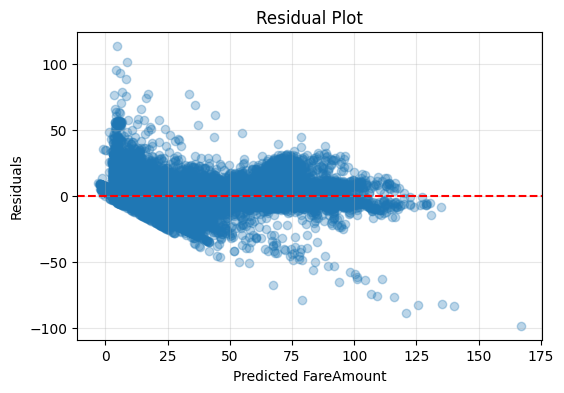

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted FareAmount")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.grid(alpha=0.3)
plt.show()

**Residual Plot**

Residuals are mostly centered around zero (zero line represents perfect prediction). Residual spread is larger for small predicted values, low-fare trips have more variability. Negative residuals increase at high predicted fares for expensive trips, the model tends to predict slightly lower than the actual fare.

# **5.2.4**

Evaluate fit

■ Are you overfitting? Underfitting? Fitting well? How do you know?

-->

Model captures 92.86% of variance, which is good.
Model is not overfitting
Model is slightly underfitting (could perform better) as it shows slight underprediction for very high fares and slight overprediction for extremely low fares.

# **5.2.5**

Is there a different ML algorithm or tweak to the existing one that could be
as good or better?

■ ex. Using a different algorithm, trying ensemble methods (such as
Random Forest for Decision Tree), using regularization

■ Why or why not?

■ Optional: Extra Credit (up to 10 points each for trying up to 3
different algorithms/tweaks - 30 possible points): If yes, try it out.
How does the other algorithm/tweak compare for the metrics you
care about?

    ● Be sure to show/visualize the new performance metric(s) and
    evaluate the new fit

--> Linear model is simplest baseline model. We can use more complex models which can perform better than this one.

I am going to model:
1) Random forest regressor
2) Boosting Algorithm
3) Neural Network

These models are complex and can capture more variance than simple linear regression.

Models were taking too much time and they are eventually going to overfit. So, I am sampling data.

In [ ]:
df_sampled = df.sample(n=150000, random_state=42)

In [ ]:
df_used = df_sampled

Feature selection:

In [ ]:
selected_features = [
    "MILEAGE",
    "DURATION",
    "AIRPORT",
    "TRIPTYPE_Ordinal",
    "TRIPTYPE_Other grant program",
    "TRIPTYPE_Transport DC",
    "TRIPTYPE_Unknown",
    "MONTH",
    "distance",
    "PAYMENTTYPE"
]

X = df_used[selected_features]
y = df_used["FAREAMOUNT"]

Data split in traingin and testing:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling:  neural networks and boosting algorithms require scaled data, otherwise it cannot perform.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

1) Random Forest Regressor Model:

In [ ]:
rf_model = RandomForestRegressor(
    n_estimators=150,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
rf_r2 = r2_score(y_test, rf_preds)
rf_mae = mean_absolute_error(y_test, rf_preds)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

print("Random Forest Results:")
print("R²:", rf_r2)
print("MAE:", rf_mae)
print("MSE:", rf_mse)
print("RMSE:", rf_rmse)

Random Forest Results:
R²: 0.9546047412689428
MAE: 1.2462931673209334
MSE: 5.891967745922213
RMSE: 2.427337583840001


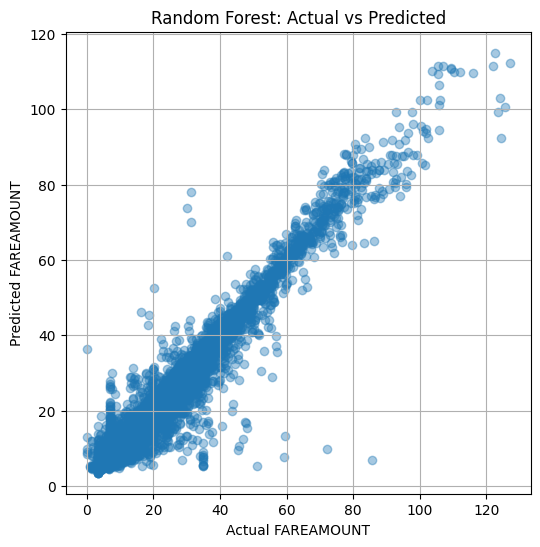

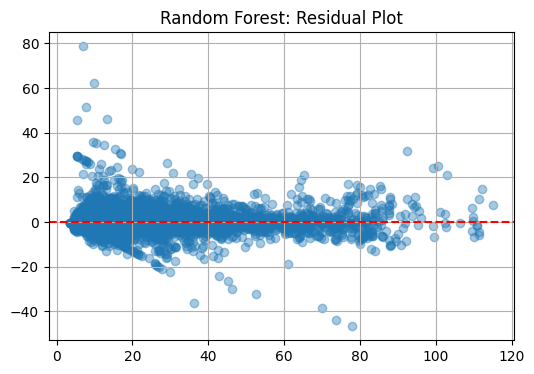

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_preds, alpha=0.4)
plt.xlabel("Actual FAREAMOUNT")
plt.ylabel("Predicted FAREAMOUNT")
plt.title("Random Forest: Actual vs Predicted")
plt.grid(True)
plt.show()

rf_residuals = y_test - rf_preds
plt.figure(figsize=(6,4))
plt.scatter(rf_preds, rf_residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Random Forest: Residual Plot")
plt.grid(True)
plt.show()

This is a lot better than linear regressiom. We can see that most of data follows straight diagonal line in the histogram.

2) Gradient Boosting Model:

In [ ]:
gb_model = GradientBoostingRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train_scaled, y_train)
gb_preds = gb_model.predict(X_test_scaled)


In [ ]:
gb_r2 = r2_score(y_test, gb_preds)
gb_mae = mean_absolute_error(y_test, gb_preds)
gb_mse = mean_squared_error(y_test, gb_preds)
gb_rmse = np.sqrt(gb_mse)

print("Gradient Boosting Results:")
print("R²:", gb_r2)
print("MAE:", gb_mae)
print("MSE:", gb_mse)
print("RMSE:", gb_rmse)


Gradient Boosting Results:
R²: 0.9512399704020876
MAE: 1.3631940105557951
MSE: 6.328690037502983
RMSE: 2.5156887799374115


Random forest regressor results were better.

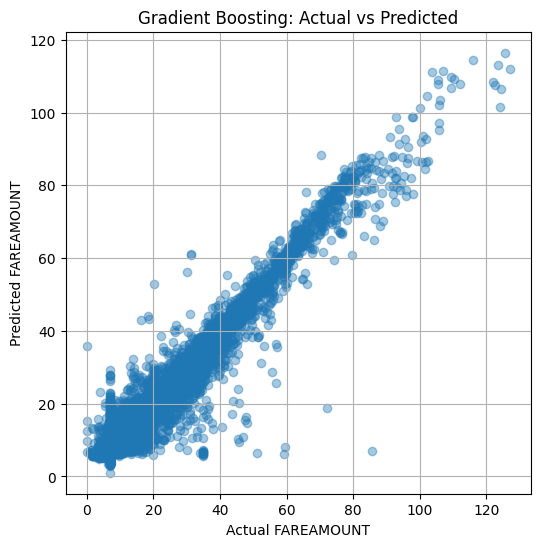

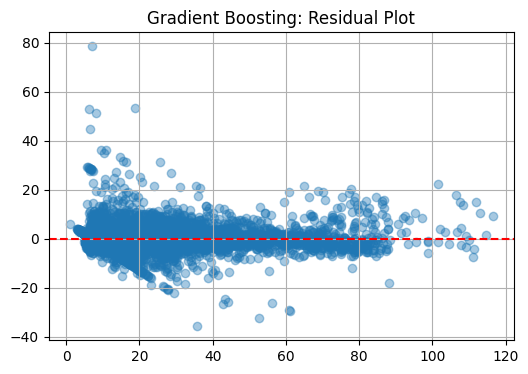

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, gb_preds, alpha=0.4)
plt.xlabel("Actual FAREAMOUNT")
plt.ylabel("Predicted FAREAMOUNT")
plt.title("Gradient Boosting: Actual vs Predicted")
plt.grid(True)
plt.show()

gb_residuals = y_test - gb_preds
plt.figure(figsize=(6,4))
plt.scatter(gb_preds, gb_residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("Gradient Boosting: Residual Plot")
plt.grid(True)
plt.show()

3) Multilayer Perceptron:

In [ ]:
mlp_model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation="relu",
    solver="adam",
    learning_rate_init=0.001,
    max_iter=300,
    random_state=42
)

mlp_model.fit(X_train_scaled, y_train)
mlp_preds = mlp_model.predict(X_test_scaled)


In [ ]:
mlp_r2 = r2_score(y_test, mlp_preds)
mlp_mae = mean_absolute_error(y_test, mlp_preds)
mlp_mse = mean_squared_error(y_test, mlp_preds)
mlp_rmse = np.sqrt(mlp_mse)

print("Neural Network Results:")
print("R²:", mlp_r2)
print("MAE:", mlp_mae)
print("MSE:", mlp_mse)
print("RMSE:", mlp_rmse)


Neural Network Results:
R²: 0.9582193759149191
MAE: 1.2409966588491728
MSE: 5.4228149898258
RMSE: 2.328693837718003


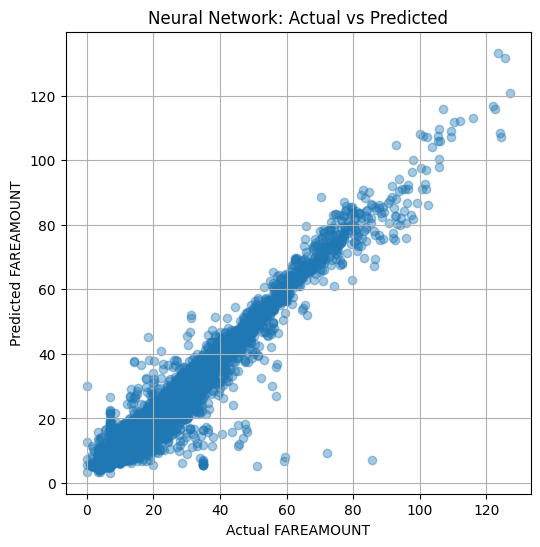

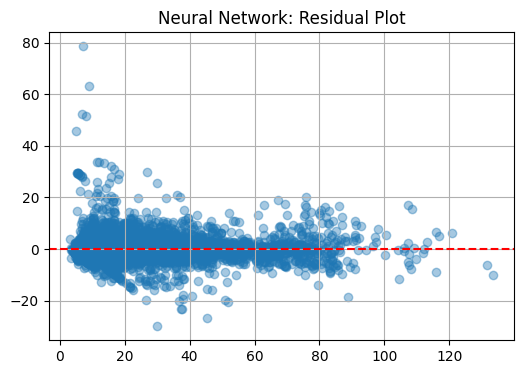

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, mlp_preds, alpha=0.4)
plt.xlabel("Actual FAREAMOUNT")
plt.ylabel("Predicted FAREAMOUNT")
plt.title("MLP: Actual vs Predicted")
plt.grid(True)
plt.show()

mlp_residuals = y_test - mlp_preds
plt.figure(figsize=(6,4))
plt.scatter(mlp_preds, mlp_residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.title("MLP: Residual Plot")
plt.grid(True)
plt.show()

To increase model performance, I should increase complexity. I can-
- Increase sample size (150k data is not sufficient)
- Increase number of layers
- Train more using epochs
- Early stopping to prevent overfitting
- Tune optimizer with learning rate

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [ ]:
df_sampled = df.sample(n=2000000, random_state=42)

In [ ]:
df_used = df_sampled

In [ ]:
selected_features = [
    "MILEAGE",
    "DURATION",
    "AIRPORT",
    "TRIPTYPE_Ordinal",
    "TRIPTYPE_Other grant program",
    "TRIPTYPE_Transport DC",
    "TRIPTYPE_Unknown",
    "MONTH",
    "distance",
    "PAYMENTTYPE"
]

X = df_used[selected_features]
y = df_used["FAREAMOUNT"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**4) Deep Neural Network:**

In [ ]:
model = Sequential([

    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    BatchNormalization(),
    Dropout(0.15),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.15),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.10),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.05),


    Dense(1)
])


optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This model is trained using trial and error approach. I have tried various cases by increasing or decreasing number of hidden layers, dropout values, optimizer learning rates and it is documented here- https://docs.google.com/document/d/10xmJF_KRaQo2_R0VQTm45ru_6BqGC5YFRuB8ezh5TuI/edit?usp=sharing

In [ ]:
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=60,
    batch_size=512,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - loss: 107.4507 - mae: 7.7474 - val_loss: 6.3417 - val_mae: 1.3090
Epoch 2/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - loss: 8.6457 - mae: 1.7307 - val_loss: 5.9497 - val_mae: 1.2800
Epoch 3/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 25s 10ms/step - loss: 8.0731 - mae: 1.6526 - val_loss: 6.1993 - val_mae: 1.2944
Epoch 4/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 7.8570 - mae: 1.6131 - val_loss: 5.8114 - val_mae: 1.2557
Epoch 5/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 7.7006 - mae: 1.5864 - val_loss: 5.7735 - val_mae: 1.2382
Epoch 6/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.4225 - mae: 1.5673 - val_loss: 5.6672 - val_mae: 1.2218
Epoch 7/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 7.2347 - mae: 1.5525 - val_loss: 5.8193 - val_mae: 1.2415
Epoch 8/60
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 7.2550 - mae: 1.5504 - val_loss: 5.5988 - val_mae: 1.1669
Epoch 9/60
2500/2500 ━━━━━━━━━━

In [ ]:
y_pred_nn = model.predict(X_test_scaled)

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 18s 1ms/step


In [ ]:
model.save("/content/drive/MyDrive/OpenDataDC_Taxi_2024/neuralnetworkfarepredictor.h5")


In [ ]:
r2_nn = r2_score(y_test, y_pred_nn)
mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

print("\nNeural Network Accuracy Metrics:")
print("R² Score:", r2_nn)
print("MAE:", mae_nn)
print("MSE:", mse_nn)
print("RMSE:", rmse_nn)



Neural Network Accuracy Metrics:
R² Score: 0.9582108228014744
MAE: 1.1729439939007757
MSE: 5.302805324062949
RMSE: 2.30278208349443


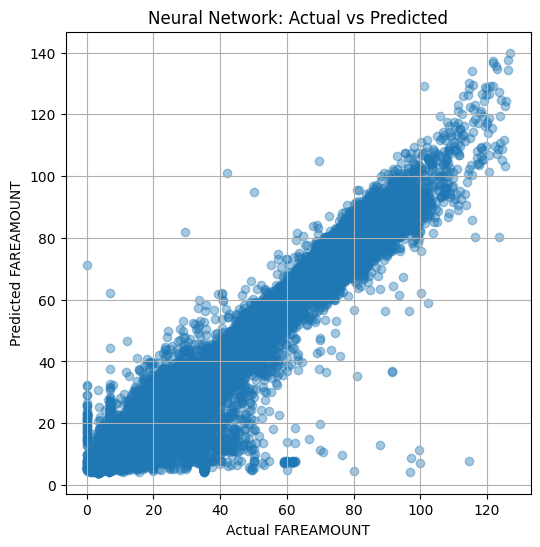

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_nn, alpha=0.4)
plt.xlabel("Actual FAREAMOUNT")
plt.ylabel("Predicted FAREAMOUNT")
plt.title("Neural Network: Actual vs Predicted")
plt.grid(True)
plt.show()


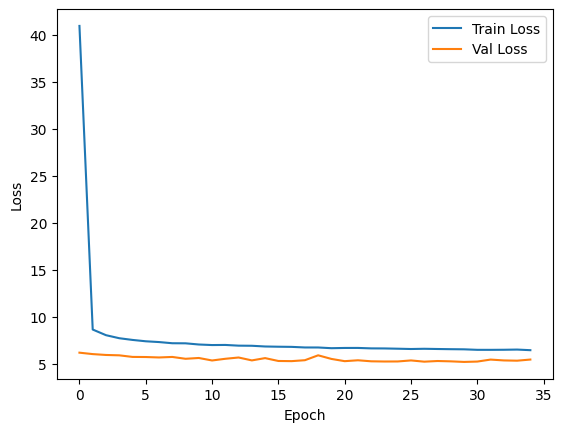

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train Loss', 'Val Loss'])
plt.show()


The neural network is converging at a point where difference between training and validation loss is minimal. Also, validation loss is less than training loss which means that our model is not overfitting.
This is by far the best possible prediction model we achieved.

Model Accuracies:
1) Linear Regression:
- R² Score: 0.9286150029342496
- MAE: 1.6570447464435072
- MSE: 9.056992898430186
- RMSE: 3.0094838259127075

2) Random Forest:
- R²: 0.9546
- MAE: 1.24
- MSE: 5.89
- RMSE: 2.42

3) Gradient Boosting:
- R²: 0.9512
- MAE: 1.36
- MSE: 6.32
- RMSE: 2.51

4) MLP(Multilayer Perceptron):
- R²: 0.9582
- MAE: 1.24
- MSE: 5.42
- RMSE: 2.32

5) NN (Deep Neural Network):
- R² Score: 0.9591
- MAE: 1.15
- MSE: 5.18
- RMSE: 2.27

Even though, there is not significant difference between MLP and Deep Neural Network, Deep Neural Network Performed better. It captured 95.91% of variance in FAREAMOUNT feature.

This is the model with best results.

# **5.3.1**

What did you find in terms of your hypothesis?

**Original Hypothesis:**

If a trip involves the airport (pickup or drop-off), the fare amount will be higher than for non-airport trips.

At first, the analysis supported hypothesis. (Last visualization in 3.5.3) stated already depicted that airport trips have higher fares than non-airport trips.

But we are going to check once again using our model, if it has captured the same relationship as expected, i.e. airport trip increase the fare amount.


We will load the neural network model saved previously in our drive folder.

In [ ]:
!find . -name "scaler.pkl"

./drive/MyDrive/OpenDataDC_Taxi_2024/scaler.pkl


In [ ]:
from tensorflow.keras.models import load_model
import pickle

model = load_model("/content/drive/MyDrive/OpenDataDC_Taxi_2024/neuralnetworkfarepredictor.h5",
    compile=False
)
with open("/content/drive/MyDrive/OpenDataDC_Taxi_2024/scaler.pkl", "rb") as f:
    scaler = pickle.load(f)

Now, we will write a function that takes input from user(us), put it in an array, scale the data and predict the taxi fare.

In [ ]:
def predict_fare():
    MILEAGE = float(input("MILEAGE: "))
    DURATION = float(input("DURATION: "))
    AIRPORT = int(input("AIRPORT (encoded): "))
    TRIPTYPE_Ordinal = int(input("TRIPTYPE_Ordinal: "))
    TRIPTYPE_Other = int(input("TRIPTYPE_Other grant program (0/1): "))
    TRIPTYPE_TransportDC = int(input("TRIPTYPE_Transport DC (0/1): "))
    TRIPTYPE_Unknown = int(input("TRIPTYPE_Unknown (0/1): "))
    MONTH = int(input("MONTH (1–12): "))
    distance = float(input("distance: "))
    PAYMENTTYPE = int(input("PAYMENTTYPE (encoded): "))

    x = np.array([
        MILEAGE,
        DURATION,
        AIRPORT,
        TRIPTYPE_Ordinal,
        TRIPTYPE_Other,
        TRIPTYPE_TransportDC,
        TRIPTYPE_Unknown,
        MONTH,
        distance,
        PAYMENTTYPE
    ]).reshape(1, -1)

    x_scaled = scaler.transform(x)
    pred = model.predict(x_scaled)[0][0]

    print("\nPredicted Fare:", pred)

We will call the function and input the first row of master data

but case: **Non Airport trip** (i.e. AIRPORT (encoded) = 0)

In [ ]:
predict_fare()

MILEAGE: 0.68
DURATION: 211
AIRPORT (encoded): 0
TRIPTYPE_Ordinal: 1
TRIPTYPE_Other grant program (0/1): 0
TRIPTYPE_Transport DC (0/1): 0
TRIPTYPE_Unknown (0/1): 0
MONTH (1–12): 1
distance: 1.3123545352501000
PAYMENTTYPE (encoded): 2


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 461ms/step

Predicted Fare: 5.3482356


**Airport Trip** (AIRPORT (encoded)=1)

In [ ]:
predict_fare()

MILEAGE: 0.68
DURATION: 211
AIRPORT (encoded): 1
TRIPTYPE_Ordinal: 1
TRIPTYPE_Other grant program (0/1): 0
TRIPTYPE_Transport DC (0/1): 0
TRIPTYPE_Unknown (0/1): 0
MONTH (1–12): 1
distance: 1.3123545352501000
PAYMENTTYPE (encoded): 2
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step

Predicted Fare: 8.727698


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


We have entered all the informtion same in both cases except airport (encoded)

The fare for non airport trip is $5.34

The fare for airport trip is $8.72

(all other constraints are same)

As we can see, our model has also captured the same relationship and hence it shows that airport trips cost more than non- airport trips.

# **5.3.2**

Any previous assumptions that you had to adjust, or proved wrong?

-->

I originally assumed that mileage and duration alone would explain most of the fare.
However, during modeling and correlation analysis, I learned that:

- Categorical variables like TRIPTYPE and PAYMENTTYPE meaningfully influence fare.

- The AIRPORT variable carried more predictive weight than expected.

- The dataset contained nonlinear patterns that linear models could not capture well.

- This led me to adjust my assumptions and shift toward more expressive models like Random Forest, Gradient Boosting Algorithm, and Neural Networks.

# **5.3.3**

Is the problem different from what you had originally thought?

-->

Overall, the problem turned out to be very similar to what I originally expected.
My initial belief was that fare amount is mainly determined by mileage, duration, and whether the trip involves the airport. In fact, the analysis confirmed this core idea.

The additional variables (payment type, trip category, month, etc.) did contribute, but they did not fundamentally change the nature of the problem. The relationships remained intuitive.


So while I did explore more variables than I initially anticipated, the overall structure and behavior of the prediction problem stayed the same, and the hypothesis aligned well with the final results.

# **5.3.4**

Anything you would do differently if you were to do it again?

-->

Collect additional external data such as weather, traffic congestion, or major events, which likely affect fare and duration.

I would also spend more effort on understanding temporal patterns such as peak-hour behavior, weekend vs. weekday differences, and seasonal effects (these patterns turned out to be highly informative for fare prediction but were only explored later in the project).



# **5.3.5**

Are there any policy or other decisions that could be influenced by an
analysis like yours?

■ What are they, and what could be the wider effects?

-->

This analysis can meaningfully guide several transportation and city-level policy decisions. Since the model identifies clear patterns in how fares change with airport involvement, mileage, duration, and peak hours, policymakers can use these insights to improve both fairness and efficiency within the taxi system.

1) As airport trips are consistently higher in cost, District of Columbia can evaluate whether current airport surcharges are appropriate.

* Action: Adjust or standardize airport-related fees.

* Effect: More transparent pricing for passengers and more predictable revenue for drivers.

2) The model reveals patterns related to time of day, trip type, and travel distance.

* Action: Deploy more taxis near airports or peak-demand areas during busy hours.

* Effect: Reduced wait times, improved customer satisfaction

# **5.3.6**

What ethical concerns should you or someone reading your project
consider?

■ Ex. legal, privacy, fairness, data ownership, or any other concern of
this sort that might be relevant

-->


When working with this dataset, there are a number of ethical considerations.

1) Even when names are eliminated, the data's precise pickup and drop-off coordinates may still disclose critical travel patterns. This raises the possibility of re-identifying people or deducing personal information like their residence, place of employment, or frequent visits.
2) There are concerns regarding data ownership and consent because the government collected the data; passengers might not be aware that their movement data is utilised for collection and modelling or long-term storage.
3) Fairness issue: Haversine formula is used in the project to calculate distances using pickup and drop-off co-ordinates. It calculates straight line distance between two co-ordinates on Earth (it does not reflect real on road distance). Haversine distance is still good predictor but it does not provide total precision.
4) Misuse in Future: Data can be used to classify useres with high gratuity paying tendency (Users paying high amount of tip) and can be misused to inflate trip prices for specific individuals.

# **5.3.7**

Final thoughts: Summarize your experience across all 5 projects. What did
you learn?

-->

Working through all five projects gave me a complete, end-to-end experience of what a real data science workflow feels like.

--> Starting from raw D.C. taxi trip data, I learned how much effort goes into understanding, cleaning, and preparing a dataset before any starting any modeling work.

--> Exploratory data analysis helps a lot in understanding data, identifying patterns, anamalous behaviour, if any.

--> Handling millions of rows, dealing with missing values, identifying duplicates from different months, and detecting outliers required a structured and methodical approach and it taught me careful processing of data.

--> I saw how well handling of data eases modelling process. Even simple model like linear regression performed well on this high dimentional, noisy data.

--> I learned how algorithm selection directly influence model performance. Working with neural networks showed me how factors like architecture, learning rate, and especially data quantity can significantly affect results.

--> Most importantly, the ethical reflection keept me grounded as accuracy alone is not enough—responsible data use requires considering privacy, fairness, and the broader societal impact of any model built from sensitive location data.

--> This entire sequence of projects taught me how to approach real-world data scientifically, how data science lifecycle works. It made me realize that data science is not just about algorithms, it is about understanding the data, the context, and the impact.

Most Important Thing: I AM PROUD OF MY WORK.